### Actividad 3.2

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz


In [1250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1251]:
df = pd.read_csv('projectos_forvia.csv')

In [1252]:
df = df.drop(df.index[245]).reset_index(drop=True)

In [1253]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                245 non-null    object 
 1   Active                245 non-null    object 
 2   Project Name          245 non-null    object 
 3   Project Type          245 non-null    object 
 4   Geographical scope    245 non-null    object 
 5   Project manager       245 non-null    object 
 6   State                 245 non-null    object 
 7   Percent complete      245 non-null    float64
 8   Project size          245 non-null    object 
 9   Project organization  245 non-null    object 
 10  Planned Go Live date  245 non-null    object 
 11  Project target phase  72 non-null     object 
 12  Actual Go Live date   48 non-null     object 
 13  Actual end date       0 non-null      float64
 14  BG                    245 non-null    object 
 15  Closed                1

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    173
Actual Go Live date     197
Actual end date         245
BG                        0
Closed                  244
Domain                    0
Domain Path               0
Last WAR                 13
Project Health           13
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        18
On-hold                   0
dtype: int64

In [1254]:
df["Percent complete"] = df["Percent complete"].astype(str).str.replace("%", "", regex=False)
df["Percent complete"] = pd.to_numeric(df["Percent complete"], errors="coerce")

In [1255]:
df = df.drop(columns=["Actual end date", "Closed", "Domain Path", "Actual Go Live date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                245 non-null    object 
 1   Active                245 non-null    object 
 2   Project Name          245 non-null    object 
 3   Project Type          245 non-null    object 
 4   Geographical scope    245 non-null    object 
 5   Project manager       245 non-null    object 
 6   State                 245 non-null    object 
 7   Percent complete      245 non-null    float64
 8   Project size          245 non-null    object 
 9   Project organization  245 non-null    object 
 10  Planned Go Live date  245 non-null    object 
 11  Project target phase  72 non-null     object 
 12  BG                    245 non-null    object 
 13  Domain                245 non-null    object 
 14  Last WAR              232 non-null    object 
 15  Project Health        2

#### **Procesamos outliers y nulos** 

In [1256]:
df["Planned start date 2"] = pd.to_datetime(df["Planned start date"], dayfirst=True, errors='coerce')

In [1257]:
sum = int(df["Planned start date 2"].isnull().sum())
sum

133

In [1258]:
df["Planned start date 3"] = df["Planned start date"].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')

In [1259]:
sum = int(df["Planned start date 3"].isnull().sum())
sum

0

In [1260]:
df[df["Planned start date 2"].isnull()][["Planned start date", "Planned start date 2", "Planned start date 3"]]

,Planned start date,Planned start date 2,Planned start date 3
1,18/01/2024 08:00:00,NaT,18/01/2024
7,14/10/2024 08:00:00,NaT,14/10/2024
8,14/02/2025 08:00:00,NaT,14/02/2025
9,19/09/2024 08:00:00,NaT,19/09/2024
10,21/10/2024 14:00:00,NaT,21/10/2024
...,...,...,...
235,28/03/2025 06:00:00,NaT,28/03/2025
238,28/10/2024 08:00:00,NaT,28/10/2024
239,21/01/2025 08:00:00,NaT,21/01/2025
240,25/03/2025 08:00:00,NaT,25/03/2025


In [1261]:
df['Planned start date'] = pd.to_datetime(df['Planned start date 3'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

In [1262]:
df[df["Planned start date 2"].isnull()][["Planned start date", "Planned start date 2", "Planned start date 3"]]

,Planned start date,Planned start date 2,Planned start date 3
1,2024-01-18,NaT,18/01/2024
7,2024-10-14,NaT,14/10/2024
8,2025-02-14,NaT,14/02/2025
9,2024-09-19,NaT,19/09/2024
10,2024-10-21,NaT,21/10/2024
...,...,...,...
235,2025-03-28,NaT,28/03/2025
238,2024-10-28,NaT,28/10/2024
239,2025-01-21,NaT,21/01/2025
240,2025-03-25,NaT,25/03/2025


In [1263]:
df.drop(columns=["Planned start date 2", "Planned start date 3"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Number                245 non-null    object        
 1   Active                245 non-null    object        
 2   Project Name          245 non-null    object        
 3   Project Type          245 non-null    object        
 4   Geographical scope    245 non-null    object        
 5   Project manager       245 non-null    object        
 6   State                 245 non-null    object        
 7   Percent complete      245 non-null    float64       
 8   Project size          245 non-null    object        
 9   Project organization  245 non-null    object        
 10  Planned Go Live date  245 non-null    object        
 11  Project target phase  72 non-null     object        
 12  BG                    245 non-null    object        
 13  Domain              

In [1264]:
df.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    173
BG                        0
Domain                    0
Last WAR                 13
Project Health           13
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        18
On-hold                   0
dtype: int64

### project target phase, last war, project health, actual start day (str)

In [1265]:
df["Project target phase"] =df["Project target phase"].fillna("NA") 
df["Last WAR"] =df["Last WAR"].fillna("NA")
df["Actual start date"] =df["Actual start date"].fillna("NA")


In [1266]:
df["Project Health"] =df["Project Health"].fillna('Red')

In [1267]:
df.isnull().sum()

Number                  0
Active                  0
Project Name            0
Project Type            0
Geographical scope      0
Project manager         0
State                   0
Percent complete        0
Project size            0
Project organization    0
Planned Go Live date    0
Project target phase    0
BG                      0
Domain                  0
Last WAR                0
Project Health          0
Project type            0
Recurrent activity      0
Planned start date      0
Actual start date       0
On-hold                 0
dtype: int64

#### **Project Type**

In [1268]:
tabla_freq = df['Project Type'].value_counts().reset_index()
tabla_freq

,Project Type,count
0,Shopfloor JIT/TCO,80
1,FCS roll-outs,75
2,New software or release,46
3,Shopfloor LES/NEO,13
4,Studies / Moves / Solution Selection / Other,8
5,New Site infrastructure,7
6,Overall Project Coordination,6
7,Shopfloor DMC/SPC,5
8,New infrastructure,3
9,ITAC,1


In [1269]:
# filtro con los valores más relevantes de la variable 
filtro = tabla_freq[tabla_freq['count']>1]
filtro

,Project Type,count
0,Shopfloor JIT/TCO,80
1,FCS roll-outs,75
2,New software or release,46
3,Shopfloor LES/NEO,13
4,Studies / Moves / Solution Selection / Other,8
5,New Site infrastructure,7
6,Overall Project Coordination,6
7,Shopfloor DMC/SPC,5
8,New infrastructure,3


In [1270]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index = filtro.set_index('Project Type')
filtro_index

,count
Project Type,
Shopfloor JIT/TCO,80
FCS roll-outs,75
New software or release,46
Shopfloor LES/NEO,13
Studies / Moves / Solution Selection / Other,8
New Site infrastructure,7
Overall Project Coordination,6
Shopfloor DMC/SPC,5
New infrastructure,3


Text(0, 0.5, 'Frecuencia')

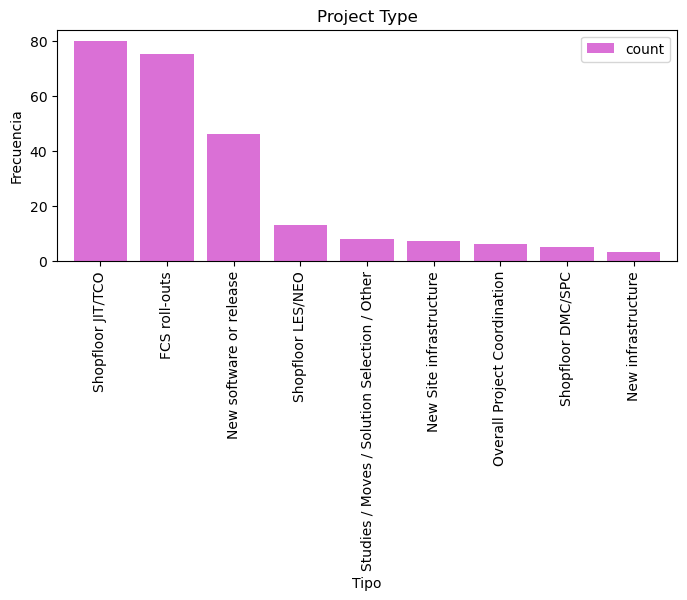

In [1271]:
# realizamos gráfico de barras
filtro_index.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Type')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

#### **Geographical Scope**

In [1272]:
tabla_freq1 = df['Geographical scope'].value_counts().reset_index()
tabla_freq1

,Geographical scope,count
0,WORLD WIDE,20
1,BRAZIL,9
2,PUEBLA HQ,7
3,BRAGANCA,6
4,PARIS TECH CENTER,5
...,...,...
121,JAPAN,1
122,JANGAN FHS,1
123,JANGAN,1
124,HERRENBERG,1


In [1273]:
# filtro con los valores más relevantes de la variable 
filtro1 = tabla_freq1[tabla_freq1['count']>3]
filtro1

,Geographical scope,count
0,WORLD WIDE,20
1,BRAZIL,9
2,PUEBLA HQ,7
3,BRAGANCA,6
4,PARIS TECH CENTER,5
5,MLADA BOLESLAV FCM Bezdecin,5
6,LIPPSTADT 2 HQH & FES R&D,5
7,GOIANA,4
8,NAO,4
9,MLADA BOLESLAV FIS,4


In [1274]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index1 = filtro1.set_index('Geographical scope')
filtro_index1

,count
Geographical scope,
WORLD WIDE,20
BRAZIL,9
PUEBLA HQ,7
BRAGANCA,6
PARIS TECH CENTER,5
MLADA BOLESLAV FCM Bezdecin,5
LIPPSTADT 2 HQH & FES R&D,5
GOIANA,4
NAO,4


Text(0, 0.5, 'Frecuencia')

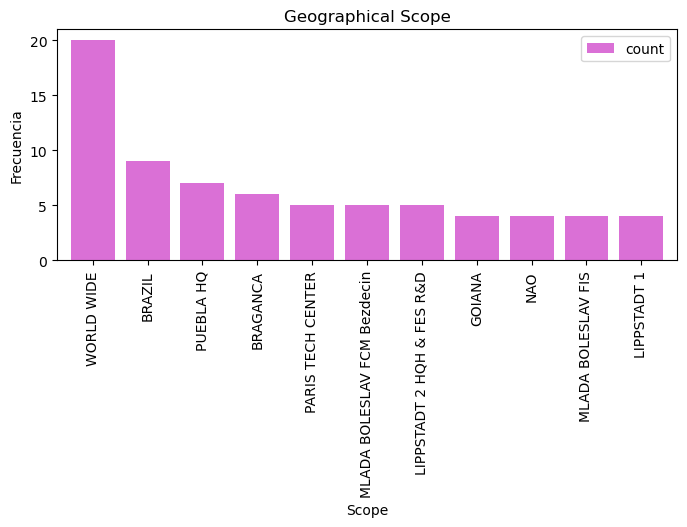

In [1275]:
# realizamos gráfico de barras
filtro_index1.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Geographical Scope')
plt.xlabel('Scope')
plt.ylabel('Frecuencia')

In [1276]:
idx = df[df["Geographical scope"] == "WORLD WIDE"].index
df = df.drop(idx)

In [1277]:
tabla_freq1 = df['Geographical scope'].value_counts().reset_index()
tabla_freq1

,Geographical scope,count
0,BRAZIL,9
1,PUEBLA HQ,7
2,BRAGANCA,6
3,LIPPSTADT 2 HQH & FES R&D,5
4,MLADA BOLESLAV FCM Bezdecin,5
...,...,...
120,JANGAN FHS,1
121,JANGAN,1
122,HERRENBERG,1
123,GIARMATA HQ,1


In [1278]:
# filtro con los valores más relevantes de la variable 
filtro1 = tabla_freq1[tabla_freq1['count']>3]
filtro1

,Geographical scope,count
0,BRAZIL,9
1,PUEBLA HQ,7
2,BRAGANCA,6
3,LIPPSTADT 2 HQH & FES R&D,5
4,MLADA BOLESLAV FCM Bezdecin,5
5,PARIS TECH CENTER,5
6,LIPPSTADT 1,4
7,MLADA BOLESLAV FIS,4
8,NAO,4
9,GOIANA,4


In [1279]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index1 = filtro1.set_index('Geographical scope')
filtro_index1

,count
Geographical scope,
BRAZIL,9
PUEBLA HQ,7
BRAGANCA,6
LIPPSTADT 2 HQH & FES R&D,5
MLADA BOLESLAV FCM Bezdecin,5
PARIS TECH CENTER,5
LIPPSTADT 1,4
MLADA BOLESLAV FIS,4
NAO,4


Text(0, 0.5, 'Frecuencia')

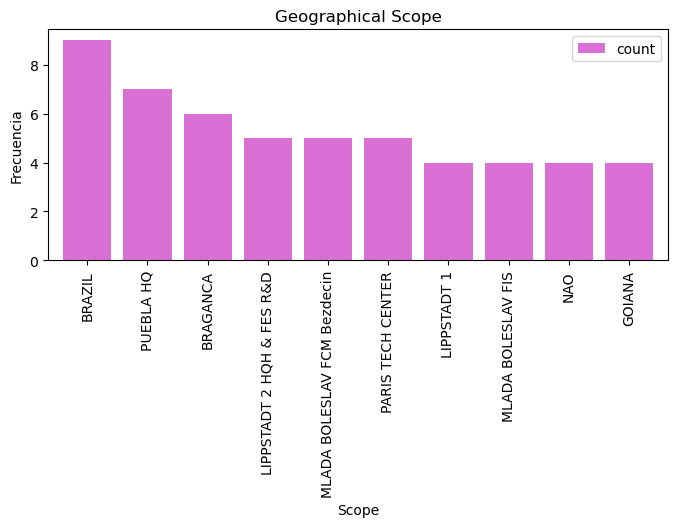

In [1280]:
filtro_index1.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Geographical Scope')
plt.xlabel('Scope')
plt.ylabel('Frecuencia')

#### **Project manager**

In [1281]:
tabla_freq2 = df['Project manager'].value_counts().reset_index()
tabla_freq2

,Project manager,count
0,SOUZA Alexandre,15
1,BENAVENT Pablo,12
2,LOUBET Diana,9
3,SVARICEK Dan,9
4,MALTER Karsten,7
...,...,...
105,AYEVA Djanwari Talata,1
106,WISCHMANN Imke,1
107,GOMEZ Tomas,1
108,GOIAN Floriana Simona,1


In [1282]:
# filtro con los valores más relevantes de la variable 
filtro2 = tabla_freq2[tabla_freq2['count']>3]
filtro2

,Project manager,count
0,SOUZA Alexandre,15
1,BENAVENT Pablo,12
2,LOUBET Diana,9
3,SVARICEK Dan,9
4,MALTER Karsten,7
5,LOURENCO Douglas,6
6,CAEIRO Helder,6
7,FENETRE Teddy,5
8,NITSCKIE Jade,5
9,ATTOF Mohamed,4


In [1283]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index2 = filtro2.set_index('Project manager')
filtro_index2

,count
Project manager,
SOUZA Alexandre,15
BENAVENT Pablo,12
LOUBET Diana,9
SVARICEK Dan,9
MALTER Karsten,7
LOURENCO Douglas,6
CAEIRO Helder,6
FENETRE Teddy,5
NITSCKIE Jade,5


Text(0, 0.5, 'Frecuencia')

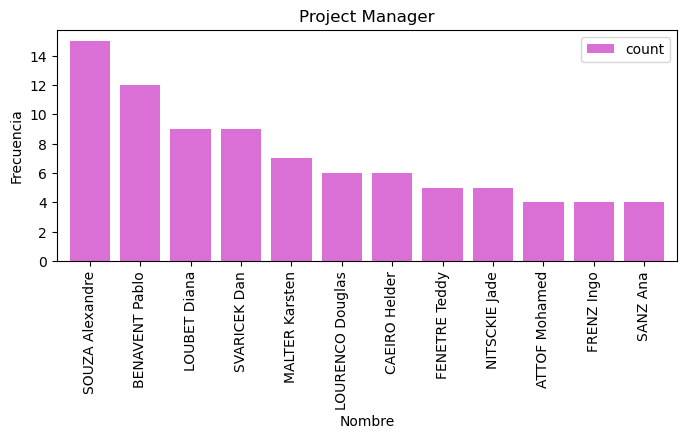

In [1284]:
# realizamos gráfico de barras
filtro_index2.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Manager')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

#### **State**

In [1285]:
tabla_freq3 = df['State'].value_counts().reset_index()
tabla_freq3

,State,count
0,Work in progress,213
1,Pending,11
2,Open,1


In [1286]:
# filtro con los valores más relevantes de la variable 
filtro3 = tabla_freq3[tabla_freq3['count']>0]
filtro3

,State,count
0,Work in progress,213
1,Pending,11
2,Open,1


In [1287]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index3 = filtro3.set_index('State')
filtro_index3

,count
State,
Work in progress,213
Pending,11
Open,1


Text(0, 0.5, 'Frecuencia')

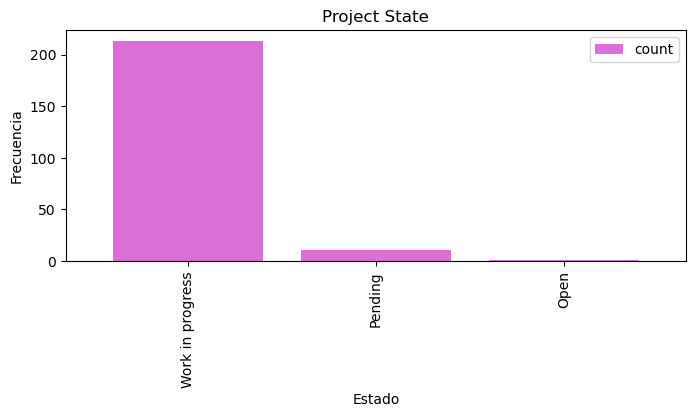

In [1288]:
# realizamos gráfico de barras
filtro_index3.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project State')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')

<Axes: ylabel='count'>

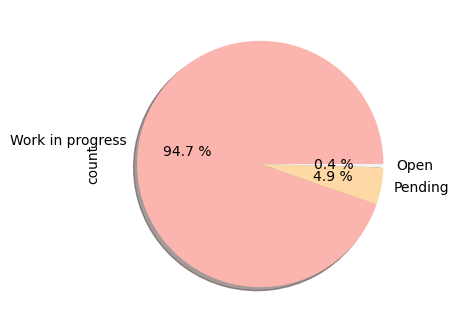

In [1289]:
filtro_index3["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Projects Size**

In [1290]:
tabla_freq4 = df['Project size'].value_counts().reset_index()
tabla_freq4

,Project size,count
0,MEDIUM,96
1,LARGE,71
2,SMALL,58


In [1291]:
# filtro con los valores más relevantes de la variable 
filtro4 = tabla_freq4[tabla_freq4['count']>1]
filtro4

,Project size,count
0,MEDIUM,96
1,LARGE,71
2,SMALL,58


In [1292]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index4 = filtro4.set_index('Project size')
filtro_index4

,count
Project size,
MEDIUM,96
LARGE,71
SMALL,58


Text(0, 0.5, 'Frecuencia')

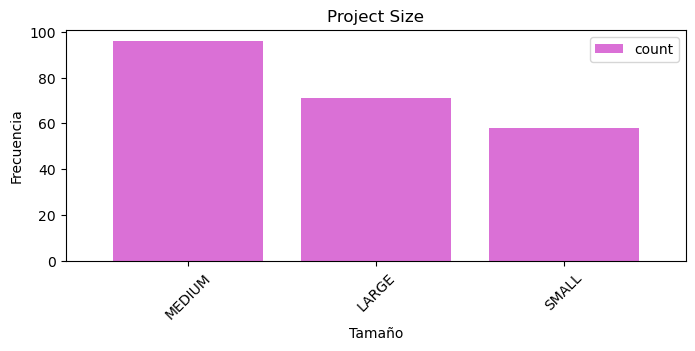

In [1293]:
# realizamos gráfico de barras
filtro_index4.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid", rot=45)
plt. title('Project Size')
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')

<Axes: ylabel='count'>

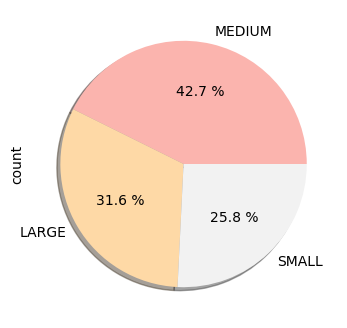

In [1294]:
filtro_index4["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Project Organization**

In [1295]:
tabla_freq5 = df['Project organization'].value_counts().reset_index()
tabla_freq5

,Project organization,count
0,GIT/IT EMEA/MES & Digital Shopfloor projects,61
1,GIT/IT EMEA/Applications rollouts & Level 2 Su...,42
2,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,15
3,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,14
4,GIT/IT NAO/MES Applications & DT/Mexico MES,13
5,GIT/IT NAO/NAO Applications/FCS,9
6,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infr...,8
7,GIT/IT NAO,8
8,GIT/Applications,8
9,GIT/IT NAO/MES Applications & DT/US MES,6


In [1296]:
# filtro con los valores más relevantes de la variable 
filtro5 = tabla_freq5[tabla_freq5['count']>4]
filtro5

,Project organization,count
0,GIT/IT EMEA/MES & Digital Shopfloor projects,61
1,GIT/IT EMEA/Applications rollouts & Level 2 Su...,42
2,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,15
3,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,14
4,GIT/IT NAO/MES Applications & DT/Mexico MES,13
5,GIT/IT NAO/NAO Applications/FCS,9
6,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infr...,8
7,GIT/IT NAO,8
8,GIT/Applications,8
9,GIT/IT NAO/MES Applications & DT/US MES,6


In [1297]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index5 = filtro5.set_index('Project organization')
filtro_index5

,count
Project organization,
GIT/IT EMEA/MES & Digital Shopfloor projects,61
GIT/IT EMEA/Applications rollouts & Level 2 Support,42
GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & BPA.,15
GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES & Digital Transformation,14
GIT/IT NAO/MES Applications & DT/Mexico MES,13
GIT/IT NAO/NAO Applications/FCS,9
GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infrastructure,8
GIT/IT NAO,8
GIT/Applications,8


Text(0, 0.5, 'Frecuencia')

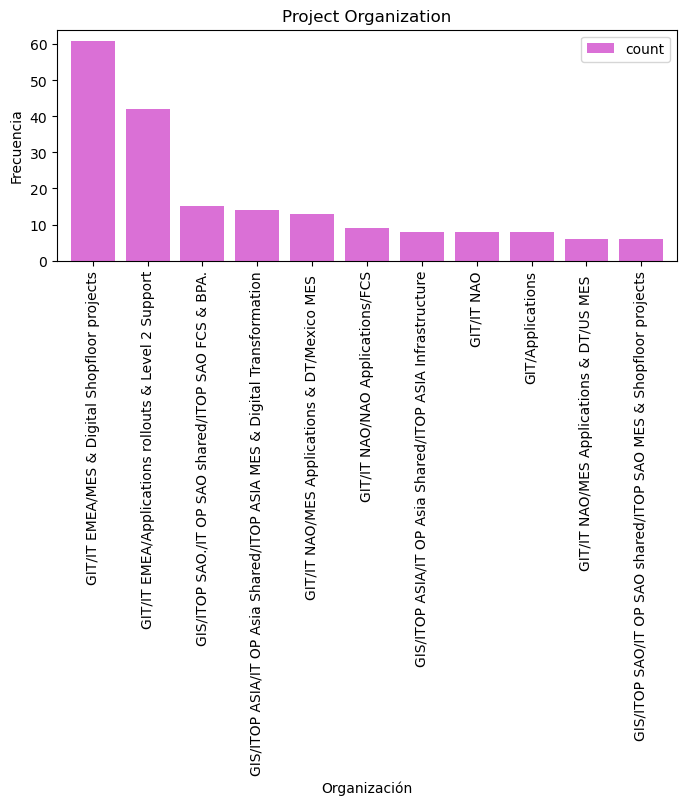

In [1298]:
# realizamos gráfico de barras
filtro_index5.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Organization')
plt.xlabel('Organización')
plt.ylabel('Frecuencia')

#### **BG**

In [1299]:
tabla_freq6 = df['BG'].value_counts().reset_index()
tabla_freq6

,BG,count
0,FIS,66
1,FCM,57
2,FAS,43
3,GROUP,29
4,FCE,8
5,FES,6
6,FLG,6
7,FLV,5
8,HQH,4
9,SAS,1


In [1300]:
# filtro con los valores más relevantes de la variable 
filtro6 = tabla_freq6[tabla_freq6['count']>5]
filtro6

,BG,count
0,FIS,66
1,FCM,57
2,FAS,43
3,GROUP,29
4,FCE,8
5,FES,6
6,FLG,6


In [1301]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index6 = filtro6.set_index('BG')
filtro_index6

,count
BG,
FIS,66
FCM,57
FAS,43
GROUP,29
FCE,8
FES,6
FLG,6


Text(0, 0.5, 'Frecuencia')

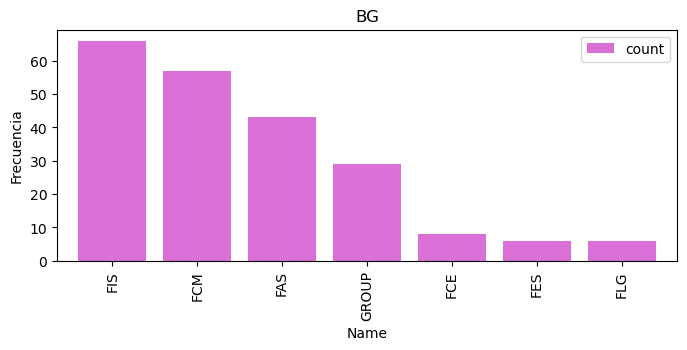

In [1302]:
# realizamos gráfico de barras
filtro_index6.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('BG')
plt.xlabel('Name')
plt.ylabel('Frecuencia')

#### **Project Health**

In [1303]:
tabla_freq7 = df['Project Health'].value_counts().reset_index()
tabla_freq7

,Project Health,count
0,Green,166
1,Yellow,46
2,Red,13


In [1304]:
# filtro con los valores más relevantes de la variable 
filtro7 = tabla_freq7[tabla_freq7['count']>1]
filtro7

,Project Health,count
0,Green,166
1,Yellow,46
2,Red,13


In [1305]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index7 = filtro7.set_index('Project Health')
filtro_index7

,count
Project Health,
Green,166
Yellow,46
Red,13


<Axes: ylabel='count'>

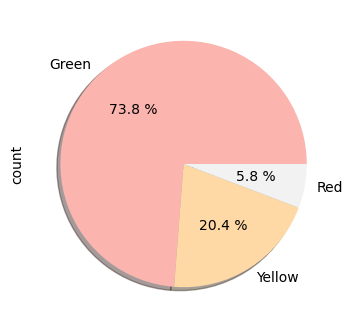

In [1306]:
filtro_index7["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **On-Hold**

In [1307]:
tabla_freq8 = df['On-hold'].value_counts().reset_index()
tabla_freq8

,On-hold,count
0,FALSO,176
1,VERDADERO,49


In [1308]:
# filtro con los valores más relevantes de la variable 
filtro8 = tabla_freq8[tabla_freq8['count']>1]
filtro8

,On-hold,count
0,FALSO,176
1,VERDADERO,49


In [1309]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index8 = filtro8.set_index('On-hold')
filtro_index8

,count
On-hold,
FALSO,176
VERDADERO,49


<Axes: ylabel='count'>

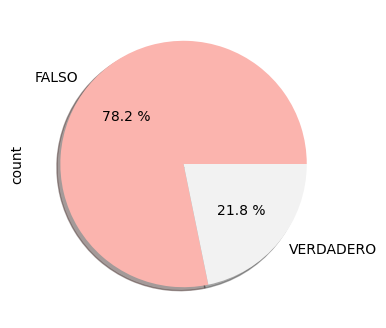

In [1310]:
# realizamos gráfico de barras
filtro_index8["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Categorizar la variable "Percent complete" aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas**

In [1311]:
df['Percent complete'].info() # Número total de la población "n"
n = 225

<class 'pandas.core.series.Series'>
Index: 225 entries, 0 to 244
Series name: Percent complete
Non-Null Count  Dtype  
--------------  -----  
225 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [1312]:
max = df['Percent complete'].max()
min = df['Percent complete'].min()
limites = [min, max]
limites

[0.0, 99.92]

In [1313]:
R = max - min
R

99.92

In [1314]:
ni = 1 + 3.32 * np.log10(n)
ni  

np.float64(8.809245960129724)

Tomaremos el número redondeado como el correcto ni = 9

In [1315]:
i = R / ni
i

np.float64(11.342628012912083)

In [1316]:
intervalos = np.linspace(-0.1, 99.82, 10)
intervalos

array([-0.1       , 11.00222222, 22.10444444, 33.20666667, 44.30888889,
       55.41111111, 66.51333333, 77.61555556, 88.71777778, 99.82      ])

In [1317]:
categorias = [
    "Categoría 1 (0.0 - 11.1)",      
    "Categoría 2 (11.1 - 22.2)",     
    "Categoría 3 (22.2 - 33.3)",    
    "Categoría 4 (33.3 - 44.4)",    
    "Categoría 5 (44.4 - 55.6)",   
    "Categoría 6 (55.6 - 66.7)", 
    "Categoría 7 (66.7 - 77.8)",  
    "Categoría 8 (77.8 - 88.9)", 
    "Categoría 9 (88.9 - 99.8)"   
]

In [1318]:
df['Percent complete'] = pd.cut(x = df['Percent complete'], bins = intervalos, labels = categorias)
df['Percent complete']

0      Categoría 3 (22.2 - 33.3)
1      Categoría 5 (44.4 - 55.6)
2      Categoría 9 (88.9 - 99.8)
3      Categoría 2 (11.1 - 22.2)
4      Categoría 3 (22.2 - 33.3)
                 ...            
240     Categoría 1 (0.0 - 11.1)
241    Categoría 9 (88.9 - 99.8)
242     Categoría 1 (0.0 - 11.1)
243    Categoría 8 (77.8 - 88.9)
244     Categoría 1 (0.0 - 11.1)
Name: Percent complete, Length: 225, dtype: category
Categories (9, object): ['Categoría 1 (0.0 - 11.1)' < 'Categoría 2 (11.1 - 22.2)' < 'Categoría 3 (22.2 - 33.3)' < 'Categoría 4 (33.3 - 44.4)' ... 'Categoría 6 (55.6 - 66.7)' < 'Categoría 7 (66.7 - 77.8)' < 'Categoría 8 (77.8 - 88.9)' < 'Categoría 9 (88.9 - 99.8)']

In [1319]:
tabla_freq9 = df['Percent complete'].value_counts().reset_index()
tabla_freq9

,Percent complete,count
0,Categoría 1 (0.0 - 11.1),69
1,Categoría 9 (88.9 - 99.8),41
2,Categoría 2 (11.1 - 22.2),30
3,Categoría 3 (22.2 - 33.3),22
4,Categoría 5 (44.4 - 55.6),16
5,Categoría 4 (33.3 - 44.4),15
6,Categoría 6 (55.6 - 66.7),12
7,Categoría 8 (77.8 - 88.9),12
8,Categoría 7 (66.7 - 77.8),6


In [1320]:
filtro9 = tabla_freq9[tabla_freq9['count']>0]
filtro9

,Percent complete,count
0,Categoría 1 (0.0 - 11.1),69
1,Categoría 9 (88.9 - 99.8),41
2,Categoría 2 (11.1 - 22.2),30
3,Categoría 3 (22.2 - 33.3),22
4,Categoría 5 (44.4 - 55.6),16
5,Categoría 4 (33.3 - 44.4),15
6,Categoría 6 (55.6 - 66.7),12
7,Categoría 8 (77.8 - 88.9),12
8,Categoría 7 (66.7 - 77.8),6


In [1321]:
filtro_index9 = filtro9.set_index('Percent complete')
filtro_index9

,count
Percent complete,
Categoría 1 (0.0 - 11.1),69
Categoría 9 (88.9 - 99.8),41
Categoría 2 (11.1 - 22.2),30
Categoría 3 (22.2 - 33.3),22
Categoría 5 (44.4 - 55.6),16
Categoría 4 (33.3 - 44.4),15
Categoría 6 (55.6 - 66.7),12
Categoría 8 (77.8 - 88.9),12
Categoría 7 (66.7 - 77.8),6


Text(0, 0.5, 'Frecuencia')

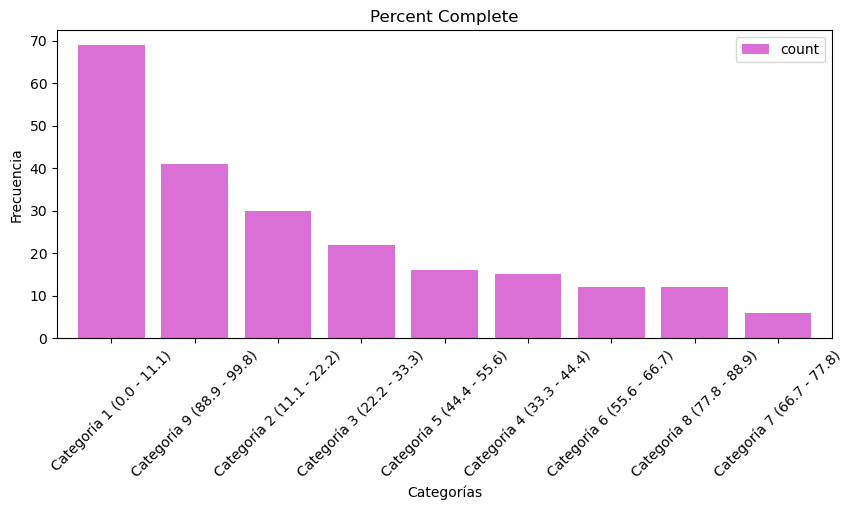

In [1322]:
filtro_index9.plot(kind = 'bar', width = 0.8, figsize = (10,4), color = "orchid", rot = 45)
plt. title('Percent Complete')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

La gráfica muestra una distribución descendente en la gestión de portfolios de proyectos.

Vemos que hay muchos proyectos apenas empezando (78 en la primera categoría) y muy pocos que ya están casi listos o terminados (solo 12 en la última).

Esto es normal es común que algunos proyectos se abandonen en el camino, otros tomen más tiempo del esperado, y solo unos cuantos logren terminarse correctamente.

## Regresión lineal simple 

Convertir las siguientes variables categóricas a numéricas de acuerdo a su jerarquía en frecuencias (Mayor Frecuencia = 1): Project Type, Geographical scope, Project manager, State, Project size, Project organization, BG, Project Health, On-hold. Obtener el dataframe que contenga únicamente a las columnas numéricas.

In [1323]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Project Type', 'Geographical scope', 'Project manager', 'State', 'Project size', 'Project organization', 'BG', 'Project Health', 'On-hold']
for col in cols:
    df[col] = le.fit_transform(df[col])
    df[col] = df[col] + 1  # Incrementar en 1 para que la mayor frecuencia sea 1
df_num = df.select_dtypes(include=[np.number])
df_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 0 to 244
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Project Type          225 non-null    int64
 1   Geographical scope    225 non-null    int64
 2   Project manager       225 non-null    int64
 3   State                 225 non-null    int64
 4   Project size          225 non-null    int64
 5   Project organization  225 non-null    int64
 6   BG                    225 non-null    int64
 7   Project Health        225 non-null    int64
 8   On-hold               225 non-null    int64
dtypes: int64(9)
memory usage: 17.6 KB


In [1324]:
print("\nTipos de datos en el dataframe convertido:")
print(df_num.dtypes)


Tipos de datos en el dataframe convertido:
Project Type            int64
Geographical scope      int64
Project manager         int64
State                   int64
Project size            int64
Project organization    int64
BG                      int64
Project Health          int64
On-hold                 int64
dtype: object


### regresión lineal simple

In [1325]:
##hacemos la matriz de correlación
print("\nMatriz de correlación:")
Corr_Factors = df_num.corr()
Corr_Factors


Matriz de correlación:


,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
Project Type,1.000000,0.116070,-0.150064,0.141691,0.092805,0.217320,0.025657,0.045141,-0.080656
Geographical scope,0.116070,1.000000,0.034761,0.027901,0.009645,0.082748,-0.227722,-0.054766,-0.071808
Project manager,-0.150064,0.034761,1.000000,-0.128892,0.156898,-0.181224,0.061832,0.021136,0.070125
State,0.141691,0.027901,-0.128892,1.000000,-0.157928,0.120862,-0.084619,-0.085652,-0.221179
Project size,0.092805,0.009645,0.156898,-0.157928,1.000000,0.115164,0.004848,-0.086617,0.111695
Project organization,0.217320,0.082748,-0.181224,0.120862,0.115164,1.000000,-0.015659,0.072307,-0.129562
BG,0.025657,-0.227722,0.061832,-0.084619,0.004848,-0.015659,1.000000,-0.060117,0.082848
Project Health,0.045141,-0.054766,0.021136,-0.085652,-0.086617,0.072307,-0.060117,1.000000,0.227482
On-hold,-0.080656,-0.071808,0.070125,-0.221179,0.111695,-0.129562,0.082848,0.227482,1.000000


In [1326]:
##valores absolutos de la matriz de correlación
print("\n Absolutos de la Matriz de correlación:")
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1


 Absolutos de la Matriz de correlación:


,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
Project Type,1.000000,0.116070,0.150064,0.141691,0.092805,0.217320,0.025657,0.045141,0.080656
Geographical scope,0.116070,1.000000,0.034761,0.027901,0.009645,0.082748,0.227722,0.054766,0.071808
Project manager,0.150064,0.034761,1.000000,0.128892,0.156898,0.181224,0.061832,0.021136,0.070125
State,0.141691,0.027901,0.128892,1.000000,0.157928,0.120862,0.084619,0.085652,0.221179
Project size,0.092805,0.009645,0.156898,0.157928,1.000000,0.115164,0.004848,0.086617,0.111695
Project organization,0.217320,0.082748,0.181224,0.120862,0.115164,1.000000,0.015659,0.072307,0.129562
BG,0.025657,0.227722,0.061832,0.084619,0.004848,0.015659,1.000000,0.060117,0.082848
Project Health,0.045141,0.054766,0.021136,0.085652,0.086617,0.072307,0.060117,1.000000,0.227482
On-hold,0.080656,0.071808,0.070125,0.221179,0.111695,0.129562,0.082848,0.227482,1.000000


<Axes: >

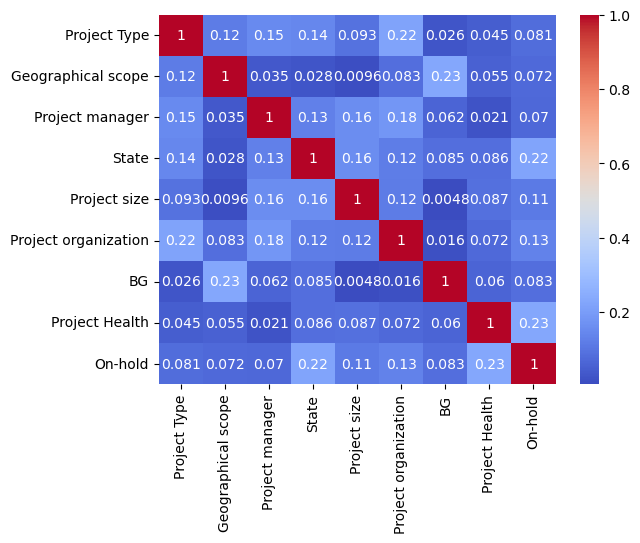

In [1327]:
### la grafica de calor 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm', annot=True)  
Heat_Map

<Axes: >

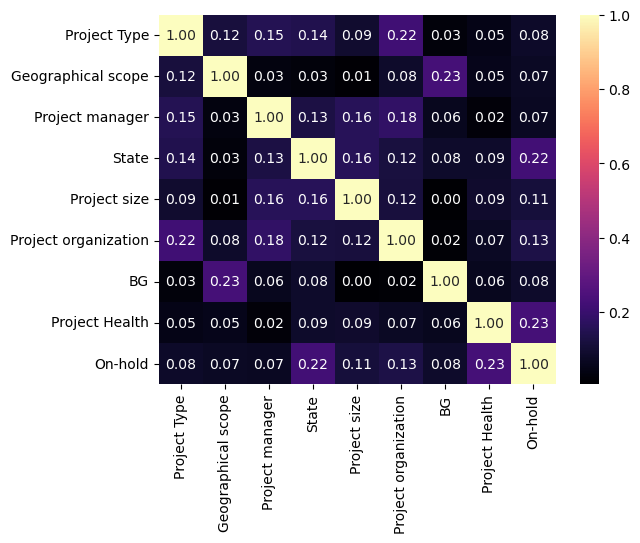

In [1328]:
###ajustamos 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'magma', annot=True, fmt=".2f")  
Heat_Map

In [1329]:
### tabla de los 5 pares 
top5 = pd.DataFrame({
    'Par de Variables': [
        'Geographical scope y BG',
        'On-hold y Project Health',
        'Project Type y Project organization',
        'State y On-hold',
        'Project manager y Project size'
    ],
    'Correlación': [0.23, 0.23, 0.22, 0.22, 0.16],
    'Interpretación': [
        'Presentan una correlación positiva débil, lo que indica que a mayor alcance geográfico del proyecto podría haber una ligera tendencia a cambios o variaciones en el indicador BG.',
        'Presentan una correlación positiva débil, lo que sugiere que los proyectos en espera tienden a tener una salud del proyecto similar.',
        'Presentan una correlación positiva débil, lo que indica que el tipo de proyecto podría estar relacionado con la organización del proyecto.',
        'Presentan una correlación positiva débil, lo que sugiere que el estado del proyecto podría estar relacionado con su estado de espera.',
        'Presentan una correlación positiva débil, lo que indica que el gerente del proyecto podría estar relacionado con el tamaño del proyecto.'
    ]
})
top5


,Par de Variables,Correlación,Interpretación
0,Geographical scope y BG,0.23,"Presentan una correlación positiva débil, lo q..."
1,On-hold y Project Health,0.23,"Presentan una correlación positiva débil, lo q..."
2,Project Type y Project organization,0.22,"Presentan una correlación positiva débil, lo q..."
3,State y On-hold,0.22,"Presentan una correlación positiva débil, lo q..."
4,Project manager y Project size,0.16,"Presentan una correlación positiva débil, lo q..."


### regresión multiple 

Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (Project Type, Geographical scope, Project manager, State, Project size, Project organization, BG, Project Health, On-hold, Percent complete), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor (lineales simples).

In [1330]:
print("\n Absolutos de la Matriz de correlación:")
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1


 Absolutos de la Matriz de correlación:


,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
Project Type,1.000000,0.116070,0.150064,0.141691,0.092805,0.217320,0.025657,0.045141,0.080656
Geographical scope,0.116070,1.000000,0.034761,0.027901,0.009645,0.082748,0.227722,0.054766,0.071808
Project manager,0.150064,0.034761,1.000000,0.128892,0.156898,0.181224,0.061832,0.021136,0.070125
State,0.141691,0.027901,0.128892,1.000000,0.157928,0.120862,0.084619,0.085652,0.221179
Project size,0.092805,0.009645,0.156898,0.157928,1.000000,0.115164,0.004848,0.086617,0.111695
Project organization,0.217320,0.082748,0.181224,0.120862,0.115164,1.000000,0.015659,0.072307,0.129562
BG,0.025657,0.227722,0.061832,0.084619,0.004848,0.015659,1.000000,0.060117,0.082848
Project Health,0.045141,0.054766,0.021136,0.085652,0.086617,0.072307,0.060117,1.000000,0.227482
On-hold,0.080656,0.071808,0.070125,0.221179,0.111695,0.129562,0.082848,0.227482,1.000000


## Project type

In [1331]:
Vars_Indep= df_num[['Project organization', 'State']]
Var_Dep= df_num['Project Type']

In [1332]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Project organization', 'State'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.09169835, 1.50307267]),
 'rank_': 2,
 'singular_': array([107.31620752,   3.74706454]),
 'intercept_': np.float64(-0.9189415818727991)}

In [1333]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['Project organization', 'State']])
y_pred

array([5.51594179, 5.51594179, 5.51594179, 5.51594179, 5.51594179,
       4.14046652, 4.50725992, 5.51594179, 5.42424344, 4.23216487,
       6.2495286 , 5.79103684, 6.2495286 , 5.51594179, 5.42424344,
       5.42424344, 5.42424344, 4.32386322, 5.51594179, 6.2495286 ,
       5.51594179, 5.51594179, 5.42424344, 5.42424344, 5.51594179,
       5.51594179, 3.00418726, 4.50725992, 4.50725992, 4.50725992,
       4.50725992, 4.50725992, 4.50725992, 4.50725992, 4.50725992,
       5.05745003, 5.51594179, 5.42424344, 5.42424344, 4.14046652,
       4.04876817, 4.04876817, 4.14046652, 3.95706982, 4.14046652,
       5.42424344, 6.34122695, 5.88273519, 5.42424344, 4.04876817,
       5.51594179, 5.42424344, 5.51594179, 5.42424344, 5.97443354,
       5.24084673, 4.69065663, 4.59895828, 3.00418726, 4.59895828,
       4.59895828, 5.51594179, 5.51594179, 5.05745003, 5.42424344,
       5.42424344, 5.51594179, 5.51594179, 5.51594179, 4.14046652,
       4.14046652, 3.95706982, 5.42424344, 3.95706982, 4.04876

In [1334]:
df_num.insert(0, 'PrediccionesTname0', y_pred)
df_num

,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,5.515942,8,1,8,3,3,21,5,1,1
1,5.515942,8,2,59,3,1,21,3,3,2
2,5.515942,8,3,96,3,2,21,3,3,1
3,5.515942,8,3,59,3,3,21,3,1,2
4,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...
240,4.140467,7,123,104,3,2,6,1,1,1
241,4.048768,3,123,16,3,1,5,1,1,1
242,4.140467,7,124,104,3,2,6,1,1,1
243,4.140467,7,125,104,3,2,6,1,1,1


In [1335]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                      Correlación simple  Coeficiente múltiple
Project organization            0.217320              0.091698
State                           0.141691              1.503073


<Axes: xlabel='Project organization', ylabel='Project Type'>

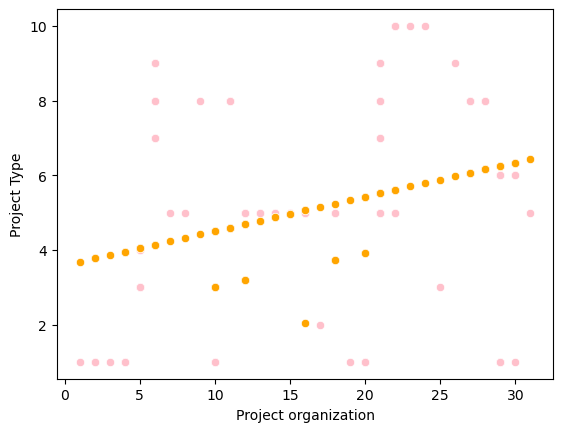

In [1336]:
sns.scatterplot(x='Project organization', y='Project Type', color="pink", data=df_num)
sns.scatterplot(x='Project organization', y='PrediccionesTname0', color="orange", data=df_num)

## Geographical scope

BG (0.23)
Project organization (0.15 aprox.)
Project Type (0.12 aprox.)

In [1337]:
Vars_Indep= df_num[['BG', 'Project organization','Project Type']]
Var_Dep= df_num['Geographical scope']

In [1338]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['BG', 'Project organization', 'Project Type'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-3.3880516 ,  0.26378869,  1.16296788]),
 'rank_': 3,
 'singular_': array([107.95336575,  47.02691478,  34.69034604]),
 'intercept_': np.float64(65.02550818984999)}

In [1339]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['BG', 'Project organization','Project Type']])
y_pred

array([62.9285557 , 69.7046589 , 69.7046589 , 69.7046589 , 69.7046589 ,
       66.91079643, 41.72195016, 64.09152358, 54.52399186, 45.5824556 ,
       63.67419327, 55.88170273, 52.54877466, 69.7046589 , 61.30009506,
       61.30009506, 54.52399186, 62.7865023 , 66.21575527, 56.89809007,
       69.7046589 , 69.7046589 , 61.30009506, 61.30009506, 69.7046589 ,
       69.7046589 , 41.72195016, 41.72195016, 41.72195016, 41.72195016,
       41.72195016, 41.72195016, 41.72195016, 41.72195016, 41.72195016,
       71.67291502, 69.7046589 , 61.30009506, 61.30009506, 72.52393176,
       42.72894247, 66.44530367, 58.97172535, 50.30337282, 73.68689964,
       61.30009506, 62.97671815, 58.16887107, 54.52399186, 64.22021995,
       75.31779423, 61.30009506, 64.09152358, 54.52399186, 65.41046703,
       62.0363376 , 43.51334745, 60.2906688 , 51.88610496, 60.2906688 ,
       60.2906688 , 62.9285557 , 64.09152358, 71.67291502, 44.35983706,
       61.30009506, 64.09152358, 62.9285557 , 62.9285557 , 66.91

In [1340]:
df_num.insert(0, 'PrediccionesGeographical scope', y_pred)
df_num

,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
240,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1341]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                      Correlación simple  Coeficiente múltiple
BG                             -0.227722             -3.388052
Project organization            0.082748              0.263789
Project Type                    0.116070              1.162968


<Axes: xlabel='BG', ylabel='Geographical scope'>

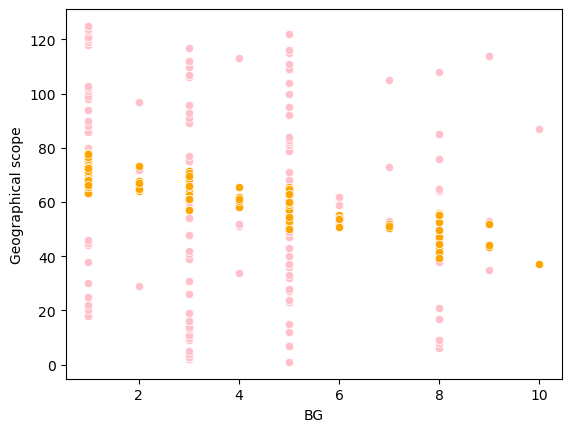

In [1342]:
sns.scatterplot(x='BG', y='Geographical scope', color="pink", data=df_num)
sns.scatterplot(x='BG', y='PrediccionesGeographical scope', color="orange", data=df_num)

## Project manager

Project size (0.16)
State (0.12 aprox.)
Project Type (0.10 aprox.)

In [1343]:
Vars_Indep= df_num[['State', 'Project size','Project Type']]
Var_Dep= df_num['Project manager']

In [1344]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['State', 'Project size', 'Project Type'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-10.21176597,   6.54512589,  -1.48156323]),
 'rank_': 3,
 'singular_': array([48.45216074, 11.29405828,  3.67289321]),
 'intercept_': np.float64(81.02941901248334)}

In [1345]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['State', 'Project size','Project Type']])
y_pred

array([58.17699293, 45.08674115, 51.63186704, 58.17699293, 51.63186704,
       43.60517792, 62.00280966, 43.60517792, 55.45768377, 49.53143084,
       62.00280966, 42.12361469, 61.1401194 , 45.08674115, 62.00280966,
       62.00280966, 62.00280966, 62.62168263, 62.62168263, 55.45768377,
       45.08674115, 45.08674115, 62.00280966, 62.00280966, 58.17699293,
       51.63186704, 78.75970152, 62.00280966, 62.00280966, 62.00280966,
       62.00280966, 55.45768377, 62.00280966, 62.00280966, 62.00280966,
       49.53143084, 58.17699293, 62.00280966, 62.00280966, 58.17699293,
       52.49455731, 52.49455731, 58.17699293, 62.00280966, 43.60517792,
       62.00280966, 48.04986761, 52.49455731, 62.00280966, 51.01299408,
       53.11343027, 62.00280966, 43.60517792, 62.00280966, 43.60517792,
       62.62168263, 56.07655674, 58.17699293, 78.75970152, 51.63186704,
       58.17699293, 58.17699293, 56.6954297 , 56.07655674, 62.00280966,
       62.00280966, 56.6954297 , 58.17699293, 45.08674115, 43.60

In [1346]:
df_num.insert(0, 'PrediccionesProject manager', y_pred)
df_num

,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1347]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

              Correlación simple  Coeficiente múltiple
State                  -0.128892            -10.211766
Project size            0.156898              6.545126
Project Type           -0.150064             -1.481563


<Axes: xlabel='Project size', ylabel='Project manager'>

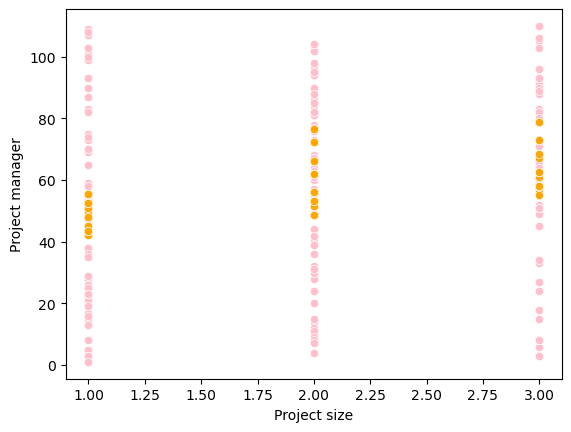

In [1348]:
sns.scatterplot(x='Project size', y='Project manager', color="pink", data=df_num)
sns.scatterplot(x='Project size', y='PrediccionesProject manager', color="orange", data=df_num)

### State

On-hold (0.22)
Project organization (0.15 aprox.)
Project Type (0.12 aprox.)

In [1349]:
Vars_Indep= df_num[['On-hold', 'Project organization','Project Type']]
Var_Dep= df_num['State']

In [1350]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['On-hold', 'Project organization', 'Project Type'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.12386837,  0.00248493,  0.00856874]),
 'rank_': 3,
 'singular_': array([107.95524644,  47.00151772,   6.12951766]),
 'intercept_': np.float64(3.0044360284928624)}

In [1351]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['On-hold', 'Project organization','Project Type']])
y_pred

array([3.00130104, 2.87743267, 3.00130104, 2.87743267, 3.00130104,
       2.97259586, 2.7901173 , 3.00986978, 2.93883495, 2.94080584,
       2.83733093, 3.0258933 , 3.00404299, 3.00130104, 2.93883495,
       2.93883495, 2.93883495, 2.94329077, 2.97559483, 2.9611993 ,
       2.87743267, 3.00130104, 2.93883495, 2.93883495, 2.87743267,
       3.00130104, 2.7901173 , 2.91398567, 2.7901173 , 2.91398567,
       2.91398567, 2.91398567, 2.7901173 , 2.7901173 , 2.7901173 ,
       2.96317019, 3.00130104, 2.93883495, 2.93883495, 2.96402713,
       2.91869851, 2.91869851, 2.96402713, 2.77520773, 2.97259586,
       2.81496658, 3.00652792, 2.96839707, 2.93883495, 2.80339887,
       2.99273231, 2.93883495, 3.00986978, 2.93883495, 2.89842605,
       2.96814005, 2.82936211, 2.97645176, 2.7901173 , 2.97645176,
       2.97645176, 3.00130104, 3.00986978, 2.96317019, 2.93883495,
       2.93883495, 3.00986978, 3.00130104, 3.00130104, 2.97259586,
       2.96402713, 2.89907611, 2.93883495, 2.89907611, 2.91869

In [1352]:
df_num.insert(0, 'PrediccionesState', y_pred)
df_num

,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1353]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                      Correlación simple  Coeficiente múltiple
On-hold                        -0.221179             -0.123868
Project organization            0.120862              0.002485
Project Type                    0.141691              0.008569


<Axes: xlabel='On-hold', ylabel='State'>

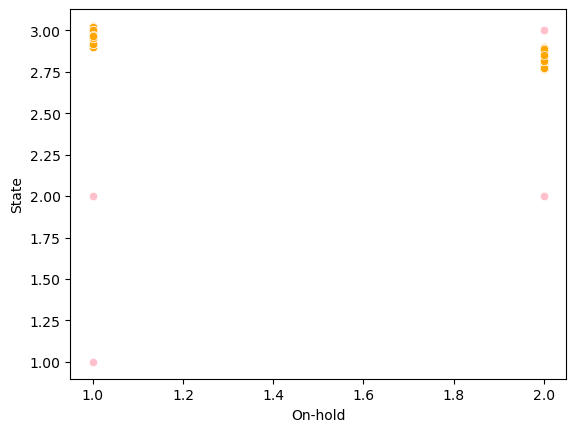

In [1354]:
sns.scatterplot(x='On-hold', y='State', color="pink", data=df_num)
sns.scatterplot(x='On-hold', y='PrediccionesState', color="orange", data=df_num)

## Project size

Project manager (0.16)
Project organization (0.14 aprox.)
Project Type (0.10 aprox.)

In [1355]:
Vars_Indep= df_num[['Project manager', 'Project organization','Project Type']]
Var_Dep= df_num['Project size']

In [1356]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Project manager', 'Project organization', 'Project Type'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00469955, 0.01372354, 0.02191539]),
 'rank_': 3,
 'singular_': array([469.25471978, 105.95094194,  46.7331583 ]),
 'intercept_': np.float64(1.3199961616198332)}

In [1357]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['Project manager', 'Project organization','Project Type']])
y_pred

array([1.82111002, 2.06078709, 2.23467046, 2.06078709, 1.82111002,
       1.8251543 , 1.90210649, 2.14849618, 1.79026574, 1.7418172 ,
       2.19575063, 2.04709793, 2.23953386, 1.91510103, 1.9735482 ,
       1.76676799, 1.8795572 , 1.56755873, 2.1689243 , 2.09236053,
       1.82111002, 1.82111002, 1.79966484, 1.86545855, 1.85400688,
       1.82111002, 1.90210649, 1.90210649, 1.90210649, 1.90210649,
       1.90210649, 1.90210649, 1.90210649, 1.90210649, 1.90210649,
       1.74314076, 2.23467046, 1.93125225, 1.93125225, 2.07111329,
       1.67523889, 1.55775014, 2.06171419, 1.56598953, 1.92854441,
       1.68217608, 2.2532574 , 1.73822996, 2.05814011, 1.9791273 ,
       1.87438744, 1.9735482 , 1.93701642, 1.9735482 , 2.12782243,
       1.94447121, 2.05481153, 1.89065483, 1.90210649, 1.89065483,
       1.89065483, 2.16887675, 2.19079214, 1.74314076, 1.67277698,
       1.76206844, 2.24248719, 2.04198889, 2.04198889, 1.67946824,
       1.60115825, 1.9090567 , 2.05814011, 1.56598953, 1.67523

In [1358]:
df_num.insert(0, 'PrediccionesProjectSize', y_pred)
df_num

,PrediccionesProjectSize,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,1.821110,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,2.060787,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,2.234670,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,2.060787,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,1.821110,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2.044498,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,1.529553,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,2.044498,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,2.044498,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1359]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                      Correlación simple  Coeficiente múltiple
Project manager                 0.156898              0.004700
Project organization            0.115164              0.013724
Project Type                    0.092805              0.021915


<Axes: xlabel='Project manager', ylabel='Project size'>

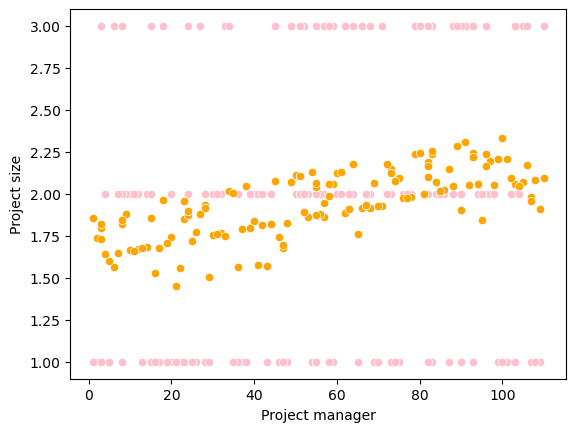

In [1360]:
sns.scatterplot(x='Project manager', y='Project size', color="pink", data=df_num)
sns.scatterplot(x='Project manager', y='PrediccionesProjectSize', color="orange", data=df_num)

## Project organization

Project Type (0.22)
Geographical scope (0.15)
Project size (0.14)

In [1361]:
Vars_Indep= df_num[['Geographical scope', 'Project size','Project Type']]
Var_Dep= df_num['Project organization']

In [1362]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Geographical scope', 'Project size', 'Project Type'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.01223722, 0.90864658, 0.4467459 ]),
 'rank_': 3,
 'singular_': array([512.34180358,  48.11888136,  11.27300631]),
 'intercept_': np.float64(13.101053459308886)}

In [1363]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['Geographical scope', 'Project size','Project Type']])
y_pred

array([19.41319765, 17.6081417 , 18.52902551, 19.43767209, 18.54126273,
       18.09159927, 15.43851587, 18.11607372, 14.54210651, 16.34132734,
       15.47522754, 18.58729407, 18.61760363, 17.70603949, 15.49970198,
       15.49970198, 15.51193921, 18.21980662, 18.23204384, 14.64000429,
       17.77946283, 17.77946283, 15.5608881 , 15.5608881 , 19.596756  ,
       18.68810941, 16.48177191, 15.57312532, 15.57312532, 15.57312532,
       15.57312532, 14.66447874, 15.57312532, 15.57312532, 15.57312532,
       16.46369957, 19.63346767, 15.59759977, 15.59759977, 19.64570489,
       15.60691944, 15.61915666, 19.68241656, 15.65878589, 18.33634374,
       15.68326034, 17.02058048, 15.68034278, 15.70773478, 16.15156313,
       18.41268464, 15.74444645, 18.42200431, 15.75668368, 18.43424153,
       18.47678831, 17.58037895, 19.84150046, 16.71427915, 18.93285388,
       19.84150046, 19.85373769, 20.30048359, 17.61709062, 15.83010702,
       15.84234424, 20.33719526, 19.89044936, 18.07315619, 18.53

In [1364]:
df_num.insert(0, 'PrediccionesProjectorg', y_pred)
df_num

,PrediccionesProjectorg,PrediccionesProjectSize,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,19.413198,1.821110,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,17.608142,2.060787,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,18.529026,2.234670,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,19.437672,2.060787,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,18.541263,1.821110,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,19.550746,2.044498,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,16.855116,1.529553,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,19.562984,2.044498,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,19.575221,2.044498,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1365]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                    Correlación simple  Coeficiente múltiple
Geographical scope            0.082748              0.012237
Project size                  0.115164              0.908647
Project Type                  0.217320              0.446746


<Axes: xlabel='Project Type', ylabel='Project organization'>

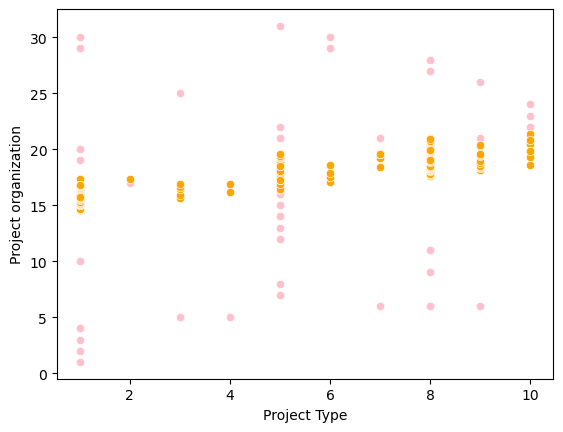

In [1366]:
sns.scatterplot(x='Project Type', y='Project organization', color="pink", data=df_num)
sns.scatterplot(x='Project Type', y='PrediccionesProjectorg', color="orange", data=df_num)

## BG

Geographical scope (0.23)
Project organization (0.15)
State (0.10 aprox.)

In [1367]:
Vars_Indep= df_num[['Geographical scope', 'Project organization','State']]
Var_Dep= df_num['BG']

In [1368]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Geographical scope', 'Project organization', 'State'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.01535784,  0.00412211, -0.73454926]),
 'rank_': 3,
 'singular_': array([512.39114236, 106.93134452,   3.74645193]),
 'intercept_': np.float64(7.181413888821797)}

In [1369]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['Geographical scope', 'Project organization','State']])
y_pred

array([5.04897252, 5.03361468, 5.01825684, 5.01825684, 5.002899  ,
       4.92570954, 4.92684013, 4.95682547, 4.95270336, 4.88375812,
       4.95908665, 4.93847611, 4.95908665, 4.91075194, 4.89127199,
       4.89127199, 4.87591415, 4.81109102, 4.84932057, 4.86693959,
       4.81860489, 4.81860489, 4.81448278, 4.81448278, 4.81860489,
       4.81860489, 5.49245312, 4.75790386, 4.75790386, 4.75790386,
       4.75790386, 4.75790386, 4.75790386, 4.75790386, 4.75790386,
       4.76727866, 4.77253136, 4.76840925, 4.76840925, 4.6953419 ,
       4.67586195, 4.66050411, 4.64926838, 4.62566632, 4.61855269,
       4.66090436, 4.68676759, 4.66615705, 4.63018867, 4.55299921,
       4.60359509, 4.58411514, 4.57287941, 4.5687573 , 4.57813211,
       4.5297974 , 4.48970691, 4.47022696, 5.20065412, 4.47022696,
       4.47022696, 4.4960902 , 4.4960902 , 4.46012182, 4.47661025,
       4.46125241, 4.45001667, 4.45001667, 4.45001667, 4.37282721,
       4.35746937, 4.33386731, 4.38446319, 4.30315163, 4.29191

In [1370]:
df_num.insert(0, 'PrediccionesProjectBG', y_pred)
df_num

,PrediccionesProjectBG,PrediccionesProjectorg,PrediccionesProjectSize,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,5.048973,19.413198,1.821110,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,5.033615,17.608142,2.060787,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,5.018257,18.529026,2.234670,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,5.018257,19.437672,2.060787,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,5.002899,18.541263,1.821110,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,3.113484,19.550746,2.044498,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,3.109362,16.855116,1.529553,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,3.098126,19.562984,2.044498,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,3.082768,19.575221,2.044498,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1371]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                      Correlación simple  Coeficiente múltiple
Geographical scope             -0.227722             -0.015358
Project organization           -0.015659              0.004122
State                          -0.084619             -0.734549


<Axes: xlabel='Project Type', ylabel='BG'>

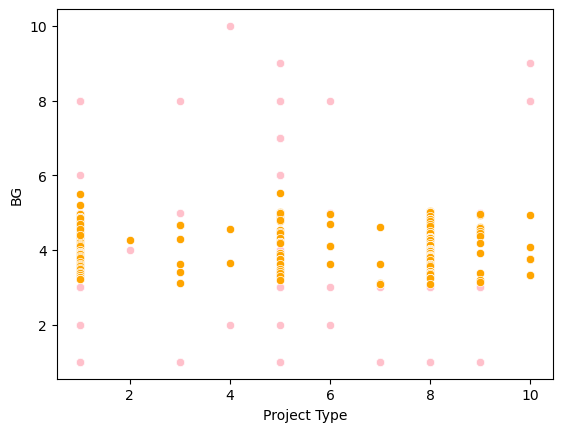

In [1372]:
sns.scatterplot(x='Project Type', y='BG', color="pink", data=df_num)
sns.scatterplot(x='Project Type', y='PrediccionesProjectBG', color="orange", data=df_num)

## Project Health

On-hold (0.23)

Project size (0.10 aprox.)

In [1373]:
Vars_Indep= df_num[['On-hold','Project size']]
Var_Dep= df_num['Project Health']

In [1374]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['On-hold', 'Project size'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.47190676, -0.12186373]),
 'rank_': 2,
 'singular_': array([11.35454987,  6.13612052]),
 'intercept_': np.float64(1.128675541557561)}

In [1375]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['On-hold','Project size']])
y_pred

array([1.23499112, 1.95062533, 1.35685485, 1.70689788, 1.35685485,
       1.47871857, 1.8287616 , 1.47871857, 1.47871857, 1.47871857,
       1.8287616 , 1.47871857, 1.23499112, 1.47871857, 1.35685485,
       1.35685485, 1.35685485, 1.23499112, 1.23499112, 1.47871857,
       1.95062533, 1.47871857, 1.35685485, 1.35685485, 1.70689788,
       1.35685485, 1.70689788, 1.35685485, 1.8287616 , 1.35685485,
       1.35685485, 1.47871857, 1.8287616 , 1.8287616 , 1.8287616 ,
       1.47871857, 1.23499112, 1.35685485, 1.35685485, 1.23499112,
       1.47871857, 1.47871857, 1.23499112, 1.8287616 , 1.47871857,
       1.8287616 , 1.47871857, 1.47871857, 1.35685485, 1.95062533,
       1.35685485, 1.35685485, 1.47871857, 1.35685485, 1.95062533,
       1.23499112, 1.8287616 , 1.23499112, 1.70689788, 1.35685485,
       1.23499112, 1.23499112, 1.23499112, 1.35685485, 1.35685485,
       1.35685485, 1.23499112, 1.23499112, 1.47871857, 1.47871857,
       1.47871857, 1.47871857, 1.35685485, 1.47871857, 1.47871

In [1376]:
df_num.insert(0, 'PrediccionesProjectH', y_pred)
df_num

,PrediccionesProjectH,PrediccionesProjectBG,PrediccionesProjectorg,PrediccionesProjectSize,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,1.234991,5.048973,19.413198,1.821110,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,1.950625,5.033615,17.608142,2.060787,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,1.356855,5.018257,18.529026,2.234670,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,1.706898,5.018257,19.437672,2.060787,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,1.356855,5.002899,18.541263,1.821110,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1.356855,3.113484,19.550746,2.044498,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,1.478719,3.109362,16.855116,1.529553,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,1.356855,3.098126,19.562984,2.044498,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,1.356855,3.082768,19.575221,2.044498,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1377]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

              Correlación simple  Coeficiente múltiple
On-hold                 0.227482              0.471907
Project size           -0.086617             -0.121864


<Axes: xlabel='On-hold', ylabel='Project Health'>

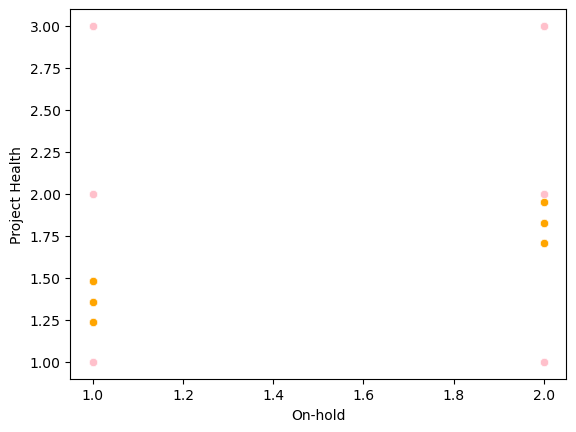

In [1378]:
sns.scatterplot(x='On-hold', y='Project Health', color="pink", data=df_num)
sns.scatterplot(x='On-hold', y='PrediccionesProjectH', color="orange", data=df_num)

## On-hold

Project Health (0.23)
State (0.22)
Project Type (0.10 aprox.)

In [1379]:
Vars_Indep= df_num[['Project Health','State','Project Type']]
Var_Dep= df_num['On-hold']

In [1380]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Project Health', 'State', 'Project Type'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.10875381, -0.31813821, -0.00802913]),
 'rank_': 3,
 'singular_': array([48.44345654, 12.15783137,  3.71854055]),
 'intercept_': np.float64(2.035628727438106)}

In [1381]:
model.score(Vars_Indep,Var_Dep)
y_pred= model.predict(X=df_num[['Project Health','State','Project Type']])
y_pred

array([1.1257349 , 1.34324253, 1.34324253, 1.1257349 , 1.1257349 ,
       1.11770577, 1.39944642, 1.11770577, 1.18193879, 1.14982228,
       1.29069261, 1.32718428, 1.14179316, 1.34324253, 1.18193879,
       1.18193879, 1.18193879, 1.36732991, 1.36732991, 1.18193879,
       1.1257349 , 1.1257349 , 1.18193879, 1.18193879, 1.1257349 ,
       1.1257349 , 1.60883082, 1.18193879, 1.18193879, 1.18193879,
       1.18193879, 1.18193879, 1.18193879, 1.39944642, 1.18193879,
       1.14982228, 1.34324253, 1.18193879, 1.18193879, 1.1257349 ,
       1.16588054, 1.16588054, 1.1257349 , 1.18193879, 1.11770577,
       1.18193879, 1.35930079, 1.38338817, 1.18193879, 1.15785141,
       1.13376403, 1.39944642, 1.3352134 , 1.18193879, 1.3352134 ,
       1.14982228, 1.36732991, 1.34324253, 1.60883082, 1.1257349 ,
       1.1257349 , 1.34324253, 1.11770577, 1.14982228, 1.39944642,
       1.18193879, 1.3352134 , 1.1257349 , 1.1257349 , 1.11770577,
       1.1257349 , 1.18193879, 1.18193879, 1.18193879, 1.16588

In [1382]:
df_num.insert(0, 'PrediccionesProjectoh', y_pred)
df_num

,PrediccionesProjectoh,PrediccionesProjectH,PrediccionesProjectBG,PrediccionesProjectorg,PrediccionesProjectSize,PrediccionesState,PrediccionesProject manager,PrediccionesGeographical scope,PrediccionesTname0,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold
0,1.125735,1.234991,5.048973,19.413198,1.821110,3.001301,58.176993,62.928556,5.515942,8,1,8,3,3,21,5,1,1
1,1.343243,1.950625,5.033615,17.608142,2.060787,2.877433,45.086741,69.704659,5.515942,8,2,59,3,1,21,3,3,2
2,1.343243,1.356855,5.018257,18.529026,2.234670,3.001301,51.631867,69.704659,5.515942,8,3,96,3,2,21,3,3,1
3,1.125735,1.706898,5.018257,19.437672,2.060787,2.877433,58.176993,69.704659,5.515942,8,3,59,3,3,21,3,1,2
4,1.125735,1.356855,5.002899,18.541263,1.821110,3.001301,51.631867,69.704659,5.515942,8,4,8,3,2,21,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1.133764,1.356855,3.113484,19.550746,2.044498,2.955458,53.113430,71.360964,4.140467,7,123,104,3,2,6,1,1,1
241,1.165881,1.478719,3.109362,16.855116,1.529553,2.918699,52.494557,66.445304,4.048768,3,123,16,3,1,5,1,1,1
242,1.133764,1.356855,3.098126,19.562984,2.044498,2.955458,53.113430,71.360964,4.140467,7,124,104,3,2,6,1,1,1
243,1.133764,1.356855,3.082768,19.575221,2.044498,2.955458,53.113430,71.360964,4.140467,7,125,104,3,2,6,1,1,1


In [1383]:
corr = df_num.corr()
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_num[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                Correlación simple  Coeficiente múltiple
Project Health            0.227482              0.108754
State                    -0.221179             -0.318138
Project Type             -0.080656             -0.008029


<Axes: xlabel='Project Health', ylabel='On-hold'>

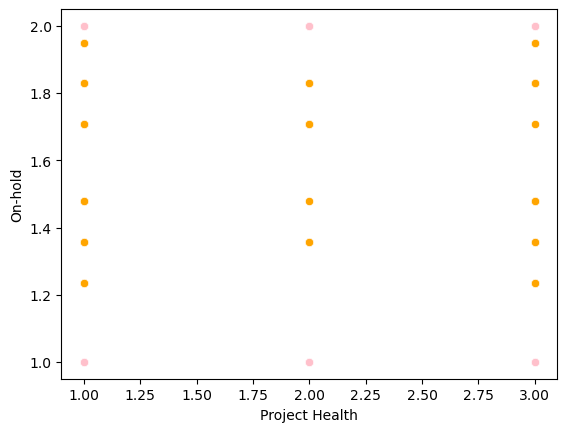

In [1384]:
sns.scatterplot(x='Project Health', y='On-hold', color="pink", data=df_num)
sns.scatterplot(x='Project Health', y='PrediccionesProjectH', color="orange", data=df_num)

### Regresion no lineal 

In [1385]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

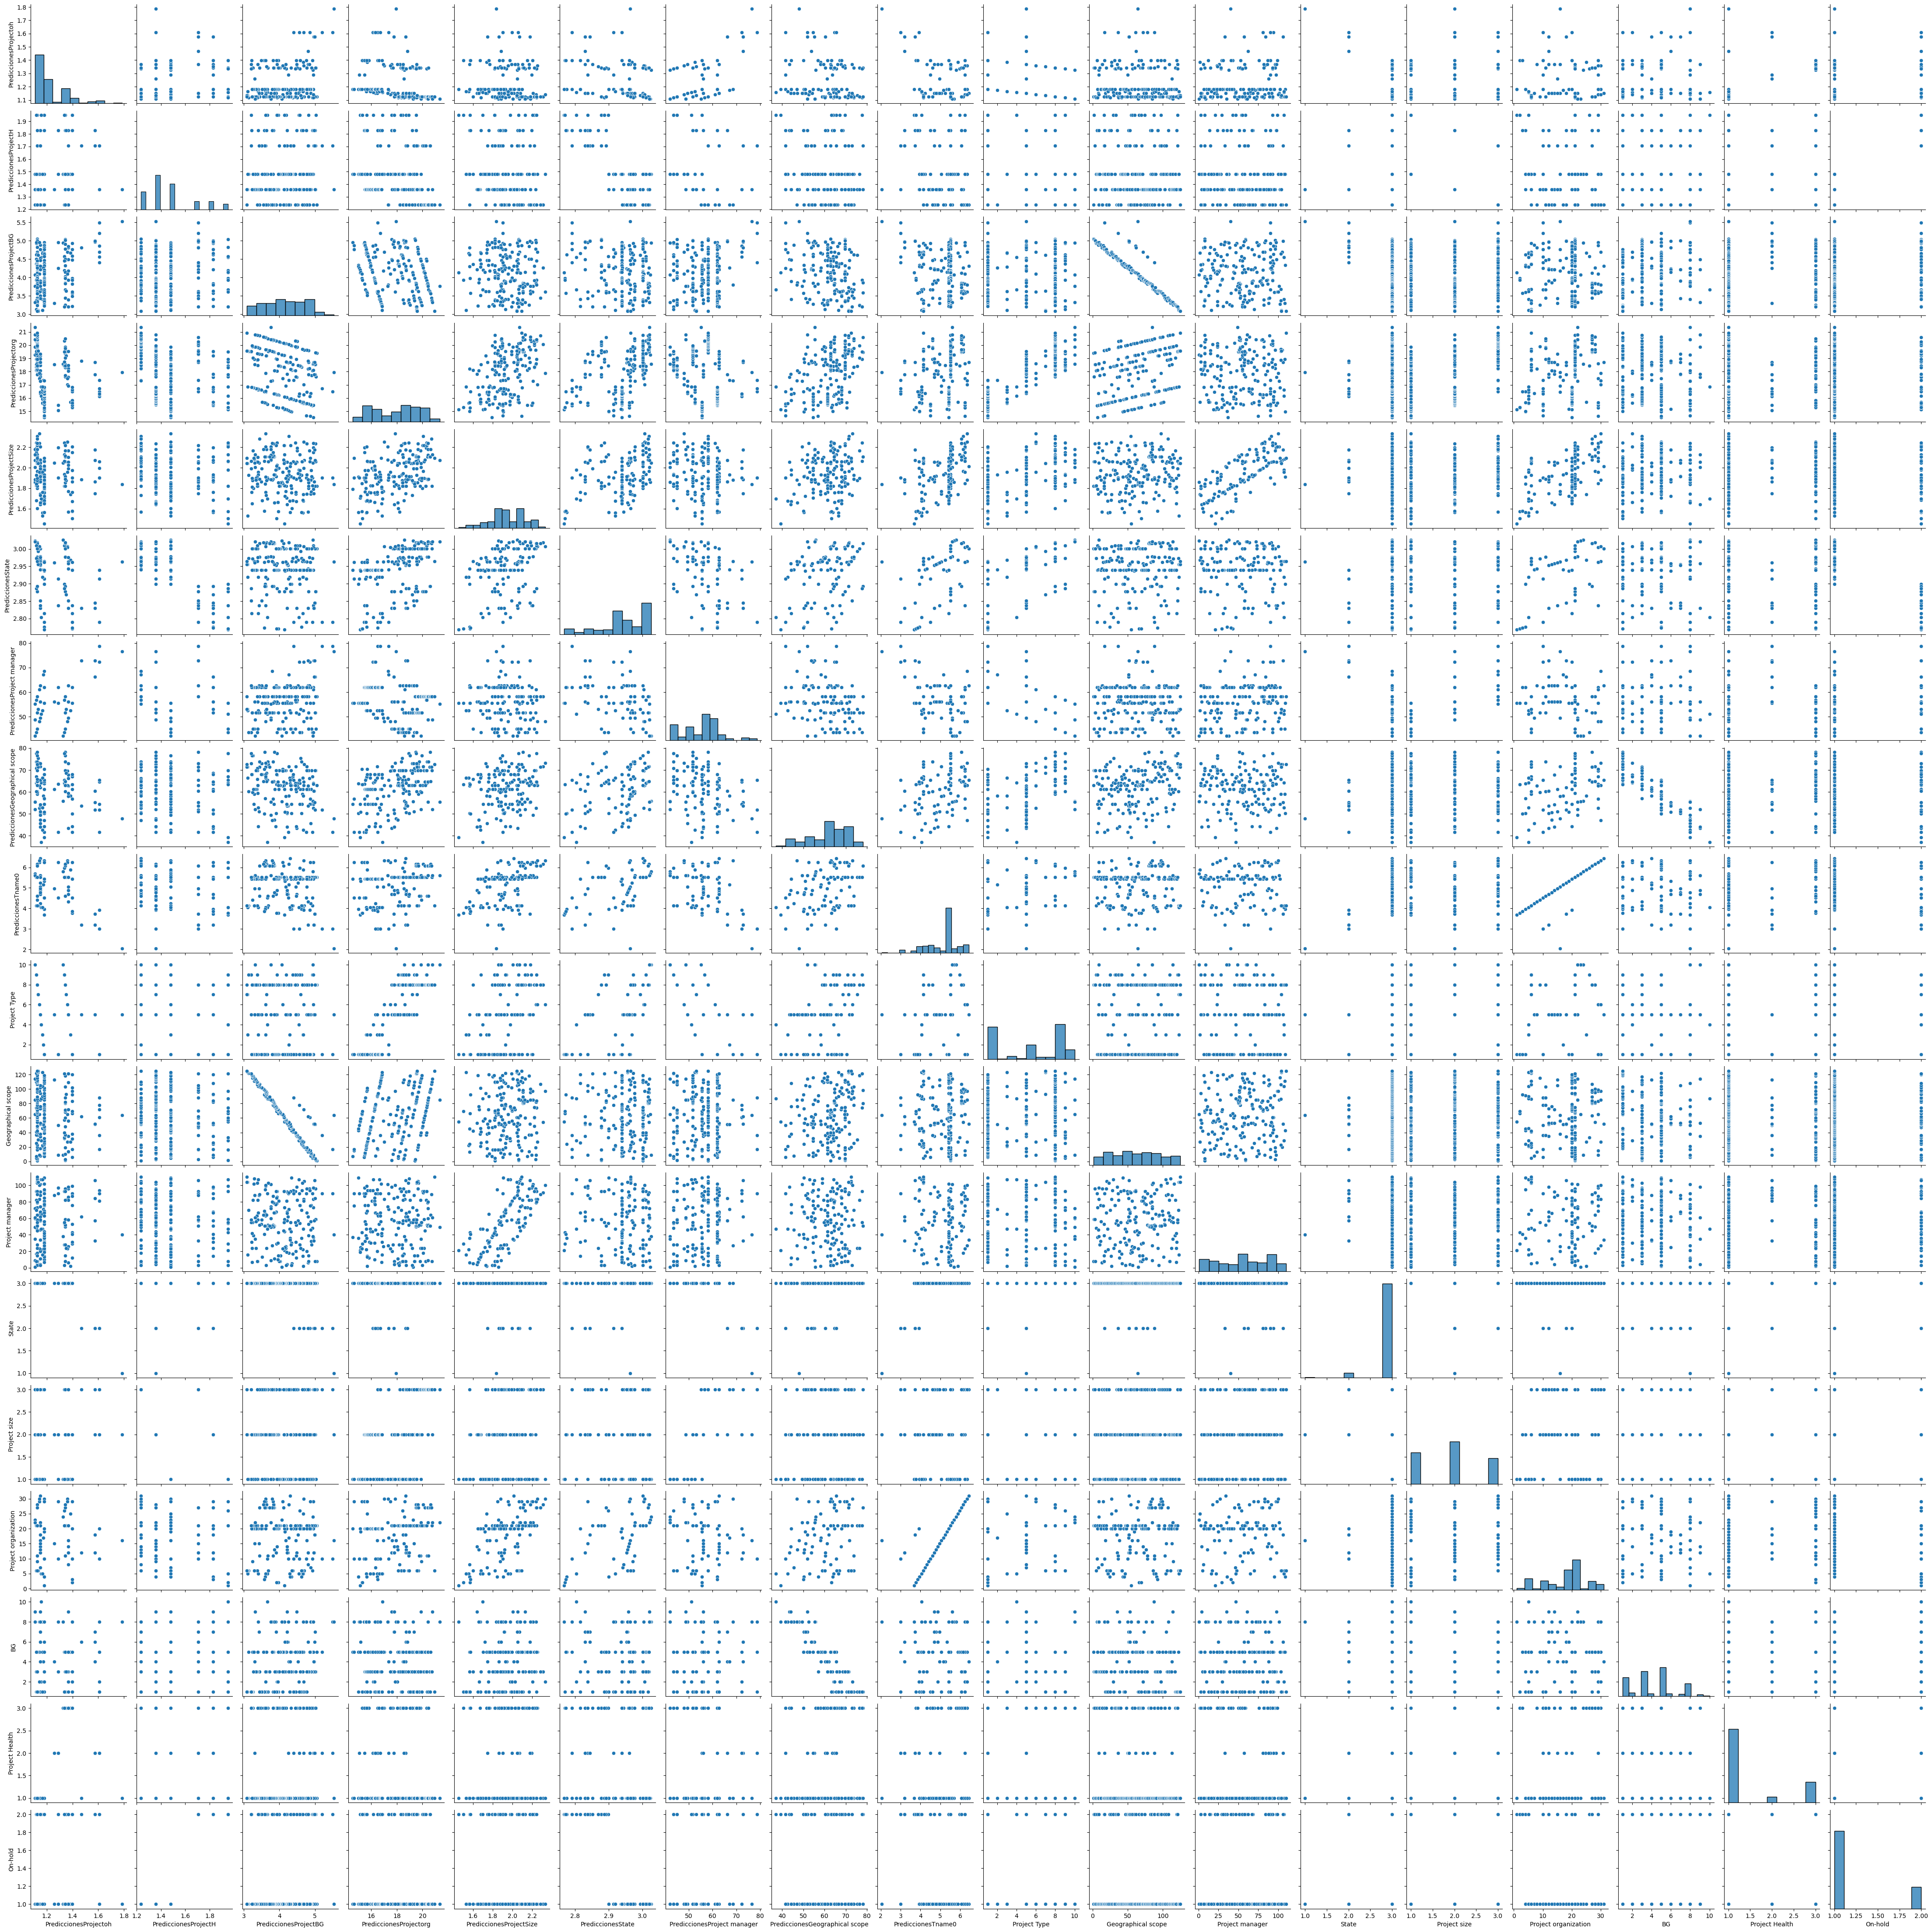

In [1386]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_num)

## Project type

 y = ax^2 + bx + c 
a*np.log(x) + b
  

### funcion cuadratica 

In [1387]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project Type']]
Var_Dep = df_num['Project organization']

In [1388]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1389]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c



In [1390]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['Project Type'], df['Project organization'])

In [1391]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 0.15528155, -0.99906873, 17.32956914])

In [1392]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [1393]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,Project Type
0,19.275038
1,19.275038
2,19.275038
3,19.275038
4,19.275038
...,...
240,17.944884
241,15.729897
242,17.944884
243,17.944884


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


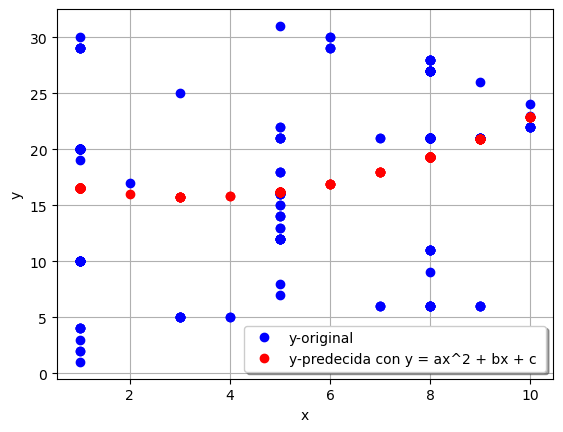

In [1394]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1395]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.06527911062812386

In [1396]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.25549777029971094)

 Es mayor que el 0.22 que marca con regresion lineal entonces el modelo cuadratico es mejor 

### funcion logaritmica 

In [1397]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project Type']]
Var_Dep = df_num['Project organization']

In [1398]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1399]:
def  func2 (x, a, b):
     return a*np.log(x) + b

In [1400]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs= curve_fit(func2, df['Project Type'], df['Project organization'])

In [1401]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([ 1.3261027 , 16.19543664])

In [1402]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [1403]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,Project Type
0,18.952990
1,18.952990
2,18.952990
3,18.952990
4,18.952990
...,...
240,18.775913
241,17.652309
242,18.775913
243,18.775913


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/399254366.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/399254366.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con y = 1/a*x ", color= "red")


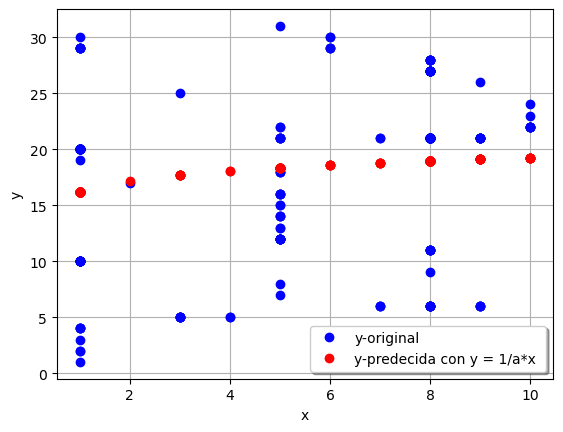

In [1404]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con y = 1/a*x ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1405]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2 

0.03006574111060978

In [1406]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.17339475514158373)

 fue el mejor modelo despues de la funcion cuadratica dandonos una r de 17, comparando a la lineal es peor pero mejor que los otros modelos 

## Geographical scope 

### funcion cuadratica con BG 

In [1407]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Geographical scope']]
Var_Dep = df_num['BG']

In [1408]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1409]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [1410]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['Geographical scope'], df['BG'])

In [1411]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-2.36875046e-04,  1.42232376e-02,  4.44699788e+00])

In [1412]:
# Predicciones
y_pred1 = func1(x, *parametros1)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


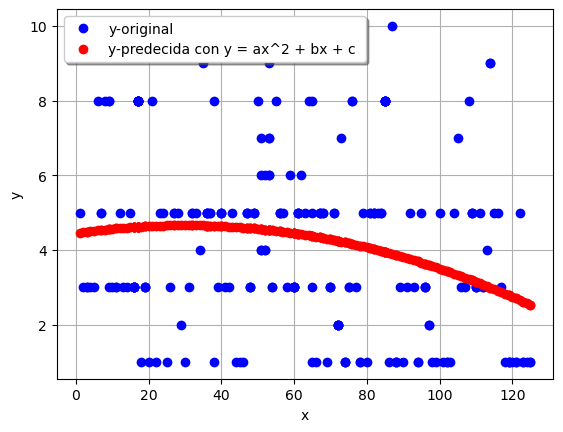

In [1413]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1414]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.06557445190788902

In [1415]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.25607509036977616)

Es mayor que 0.23 entonces este modelo tiene una r cuadrada de 0.25 entonces es mejor 

## funcion valor absoluto

In [1416]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Geographical scope']]
Var_Dep = df_num['BG']

In [1417]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1418]:
def  func3 (x, a, b, c):
     return a*np.abs(x) + b*x + c 

In [1419]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs= curve_fit(func3, df['Geographical scope'], df['BG'])

In [1420]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3

array([-100.01274671,   99.99730932,    5.09898249])

In [1421]:
# Predicciones
y_pred3 = func3(x, *parametros3)

In [1422]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred3

,Geographical scope
0,5.083545
1,5.068108
2,5.052670
3,5.052670
4,5.037233
...,...
240,3.200183
241,3.200183
242,3.184745
243,3.169308


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1983673727.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1983673727.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred3,'bo', label="y-predecida con a*np.abs(x) + b*x + c  ", color= "red")


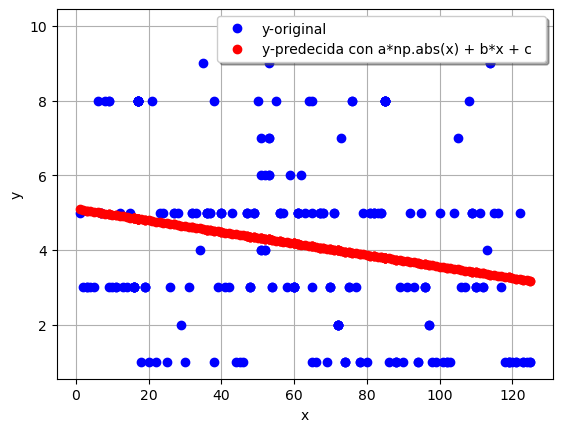

In [1423]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred3,'bo', label="y-predecida con a*np.abs(x) + b*x + c  ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1424]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3 = r2_score(y, y_pred3) 
R2_Modelo3

0.05185731005268357

In [1425]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo3)
R

np.float64(0.22772200168776746)

no es lo mejor pero se acerca al 0.23 que tenemos con funcion lineal, es la mejor opcion despues de la cuadratica ya que se probaron todas las demas

## Project manager

funcion cuadratica con project organization 

In [1426]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project manager']]
Var_Dep = df_num['Project organization']

In [1427]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1428]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [1429]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['Project manager'], df['Project organization'])

In [1430]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-1.27531997e-03,  9.71093707e-02,  1.77300815e+01])

In [1431]:
# Predicciones
y_pred1 = func1(x, *parametros1)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


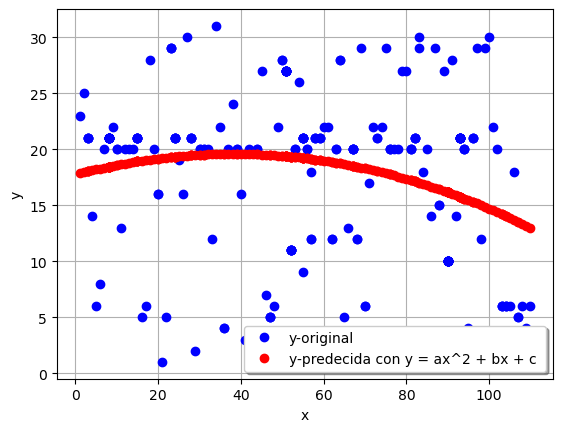

In [1432]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1433]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.05694467732470554

In [1434]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.2386308390059959)

es mejor que 0.18 por eso la funcion cuadratica es mejor que la lineal 

## exponencial

In [1435]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project manager']]
Var_Dep = df_num['Project organization']

In [1436]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1437]:
def func4(x, a, b, c):
    return a * np.exp(-b * x) + c

In [1438]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs= curve_fit(func4, df['Project manager'], df['Project organization'])

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1439]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros4

array([ 1.15850778e+04,  3.58152286e-06, -1.15648316e+04])

In [1440]:
# Predicciones
y_pred4 = func4(x, *parametros4)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1629140568.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1629140568.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4,'bo', label="y-predecida con y = a*ln(x) + b ", color= "red")


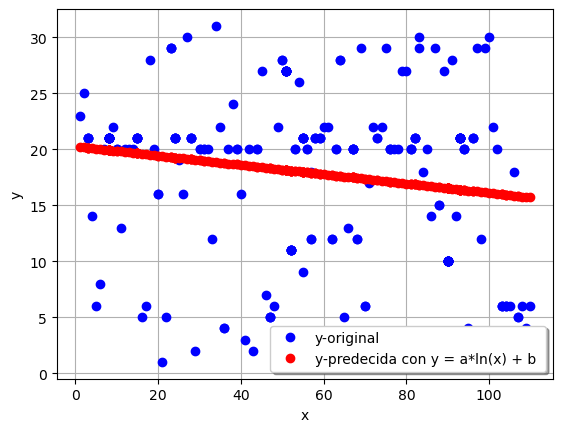

In [1441]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred4,'bo', label="y-predecida con y = a*ln(x) + b ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1442]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4

0.03283935667282567

In [1443]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo4)
R

np.float64(0.18121632562444717)

la exponencial da lo mismo que la lineal.

# State 

funcion cuadratica 

In [1444]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['State']]
Var_Dep = df_num['On-hold']

In [1445]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1446]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [1447]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['State'], df['On-hold'])

In [1448]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.6310286 ,  2.62035851, -0.98932992])

In [1449]:
# Predicciones
y_pred1 = func1(x, *parametros1)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


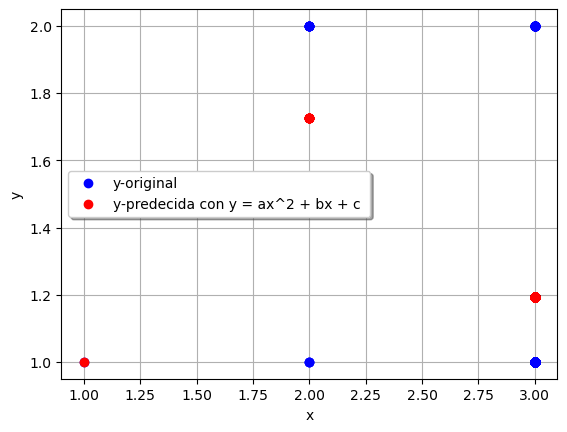

In [1450]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1451]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.07928978831667655

In [1452]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.281584424847463)

 es mejor que el 0.22 de la lineal dando un 0.28

## logaritmica 
a*np.log(x) + b

In [1453]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['State']]
Var_Dep = df_num['On-hold']

In [1454]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1455]:
def  func5 (x, a, b):
     return a*np.log(x) + b

In [1456]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs= curve_fit(func5, df['State'], df['On-hold'])


In [1457]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros5

array([-0.7064369 ,  1.97642519])

In [1458]:
# Predicciones
y_pred5 = func5(x, *parametros5)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/3832025910.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/3832025910.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred5,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


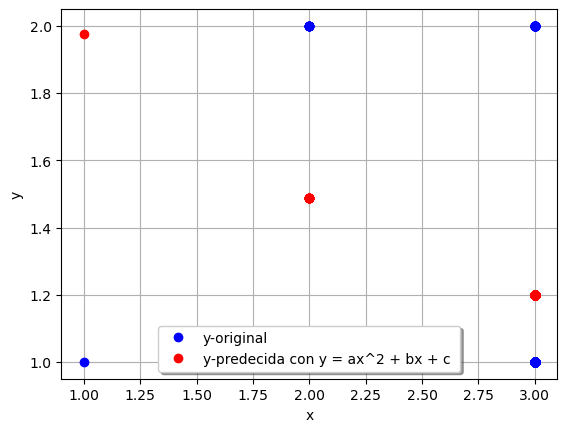

In [1459]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred5,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1460]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5 = r2_score(y, y_pred5) 
R2_Modelo5

0.03747289815252619

In [1461]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo5)
R

np.float64(0.19357917799320823)

dio como resultado 19 de r no es mejor que el 22 pero pues probando las demas es la mejor 

# Project size 

cuadratica con project manager

In [1462]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project size']]
Var_Dep = df_num['Project manager']

In [1463]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1464]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [1465]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df_num['Project size'], df_num['Project manager'])

In [1466]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-3.19616116, 19.14100696, 32.77346406])

In [1467]:
# Predicciones
y_pred1 = func1(x, *parametros1)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


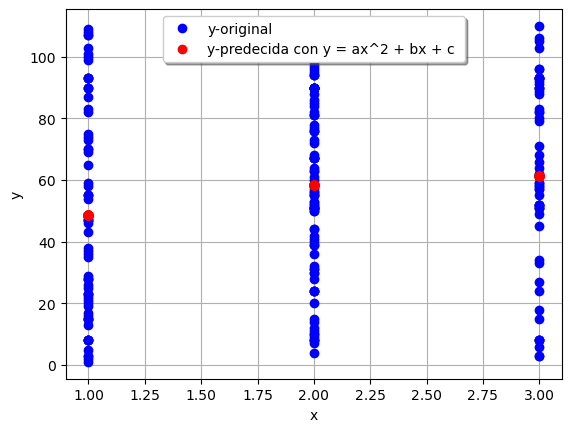

In [1468]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1469]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.027164499612914672

In [1470]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.1648165635271973)

es la mejor por que sale igual con las demas sale negativa 

### cuadratica con state

In [1471]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_num[['Project size']]
Var_Dep = df_num['State']

In [1472]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [1473]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [1474]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df_num['Project size'], df_num['State'])

In [1475]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 0.02119253, -0.13649425,  3.11530172])

In [1476]:
# Predicciones
y_pred1 = func1(x, *parametros1)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/1500642017.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


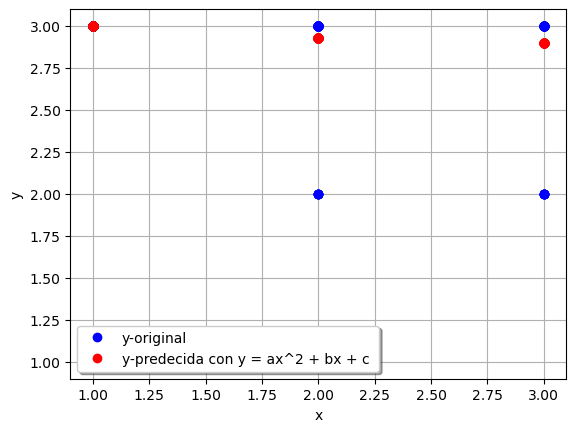

In [1477]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1478]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.026668409985587282

In [1479]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.16330465390057713)

LA R ES lo mismo pero se probaron todos los metodos y fue el mejor 

## Project organization

### funcion cuadratica 

In [1480]:
Vars_Indep = df_num[['Project organization']]
Var_Dep = df_num[['Project manager']]

In [1481]:
x= Vars_Indep
y= Var_Dep

In [1482]:
def  func_cuad (x, a, b, c):
     return a*x**2 + b*x + c

In [1483]:
parametros1, covs= curve_fit(func_cuad, df['Project organization'], df['Project manager'])

In [1484]:
parametros1

array([ 5.00905586e-02, -2.39989942e+00,  8.04280371e+01])

In [1485]:
y_pred1 = func_cuad(x, *parametros1)

In [1486]:
y_pred1

,Project organization
0,52.120086
1,52.120086
2,52.120086
3,52.120086
4,52.120086
...,...
240,67.831901
241,69.680804
242,67.831901
243,67.831901


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


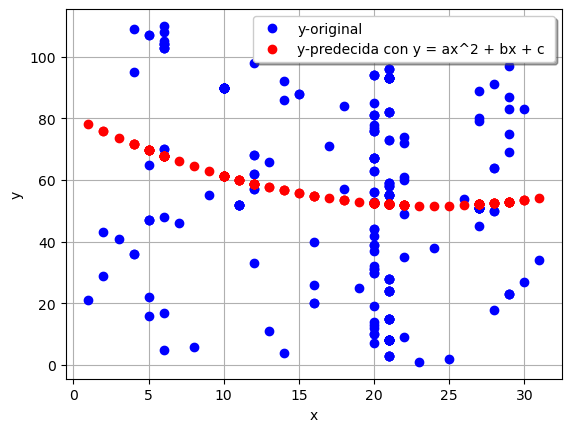

In [1487]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1488]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.04057362068918757

In [1489]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.20142894699915295)

Nos da una R de 0.20 (que es menor que el 0.22 de la regresión lineal) pero aún así este modelo es uno de los mejores.

### exponencial

In [1490]:
Vars_Indep = df_num[['Project organization']]
Var_Dep = df_num[['Project manager']]

In [1491]:
x= Vars_Indep
y= Var_Dep

In [1492]:
def func_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

In [1493]:
parametros4, covs= curve_fit(func_exp, df['Project organization'], df['Project manager'])

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1494]:
parametros4

array([36.71693192,  0.04206784, 37.95532944])

In [1495]:
y_pred4 = func_exp(x, *parametros4)

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2467899507.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2467899507.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4,'bo', label="y-predecida con y = a*ln(x) + b ", color= "red")


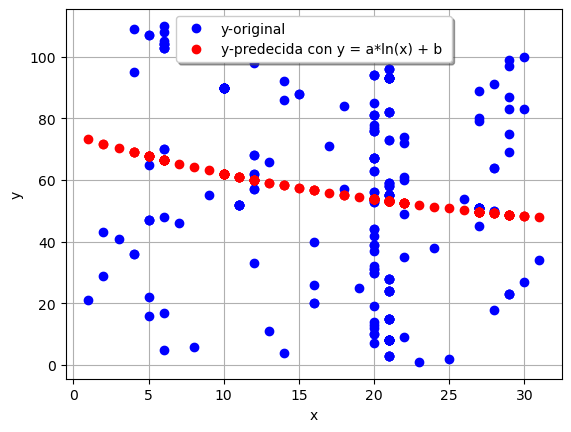

In [1496]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred4,'bo', label="y-predecida con y = a*ln(x) + b ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1497]:
R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4

0.035434750528183234

In [1498]:
R = np.sqrt(R2_Modelo4)
R

np.float64(0.1882412030565658)

Nos da una R de 0.18 (que es menor que el 0.22 de la regresión lineal y el 0.20 que el modelo cuadrático) pero aún así este modelo es uno de los mejores.

## BG

### funcion cuadratica 

In [1499]:
Vars_Indep = df_num[['BG']]
Var_Dep = df_num[['Geographical scope']]

In [1500]:
x= Vars_Indep
y= Var_Dep

In [1501]:
def  func_cuad (x, a, b, c):
     return a*x**2 + b*x + c

In [1502]:
parametros1, covs= curve_fit(func_cuad, df['BG'], df['Geographical scope'])

In [1503]:
parametros1

array([  1.15206835, -13.87608106,  93.24282998])

In [1504]:
y_pred1 = func_cuad(x, *parametros1)

In [1505]:
y_pred1

,BG
0,52.664133
1,61.983202
2,61.983202
3,61.983202
4,61.983202
...,...
240,80.518817
241,80.518817
242,80.518817
243,80.518817


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


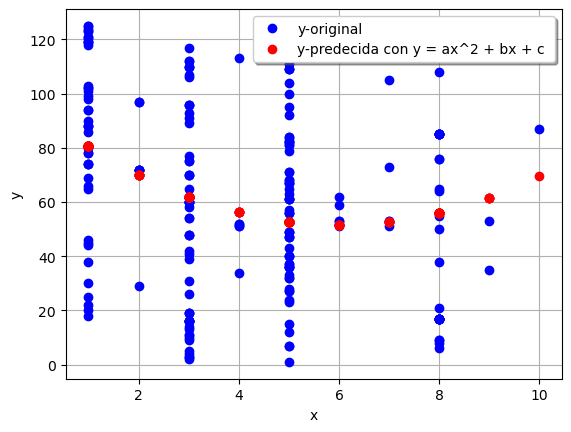

In [1506]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1507]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.08928155300288676

In [1508]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.2988001890944629)

Nos da una R de 0.29 (que es mejor que el 0.23 de la regresión lineal)

### Función cociente entre polinomios

In [1509]:
Vars_Indep = df_num[['BG']]
Var_Dep = df_num[['Geographical scope']]

In [1510]:
x= Vars_Indep
y= Var_Dep

In [1511]:
def func_coc(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [1512]:
parametros5, covs= curve_fit(func_coc, df['BG'], df['Geographical scope'])

In [1513]:
parametros5

array([1.38157846, 0.76939076, 0.02545126])

In [1514]:
y_pred5 = func_coc(x, *parametros5)

In [1515]:
y_pred5

,BG
0,55.492508
1,57.642195
2,57.642195
3,57.642195
4,57.642195
...,...
240,84.513280
241,84.513280
242,84.513280
243,84.513280


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/947207523.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/947207523.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred5,'bo', label="y-predecida con:", color= "red")


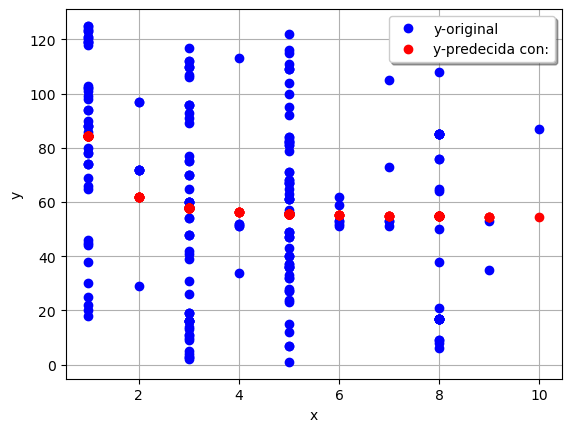

In [1516]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred5,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1517]:
R2_Modelo5 = r2_score(y, y_pred5) 
R2_Modelo5

0.1073836013022228

In [1518]:
R = np.sqrt(R2_Modelo5)
R

np.float64(0.3276943717890541)

Nos da una R de 0.32 (que es mejor que el 0.23 de la regresión lineal y el 0.29 del modelo cuadrático)

## Project Health

### funcion cuadratica 

In [1519]:
Vars_Indep = df_num[['Project Health']]
Var_Dep = df_num[['On-hold']]

In [1520]:
x= Vars_Indep
y= Var_Dep

In [1521]:
def  func_cuad (x, a, b, c):
     return a*x**2 + b*x + c

In [1522]:
parametros1, covs= curve_fit(func_cuad, df['Project Health'], df['On-hold'])

In [1523]:
parametros1

array([-0.36617037,  1.56329331, -0.04652053])

In [1524]:
y_pred1 = func_cuad(x, *parametros1)

In [1525]:
y_pred1

,Project Health
0,1.150602
1,1.347826
2,1.347826
3,1.150602
4,1.150602
...,...
240,1.150602
241,1.150602
242,1.150602
243,1.150602


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


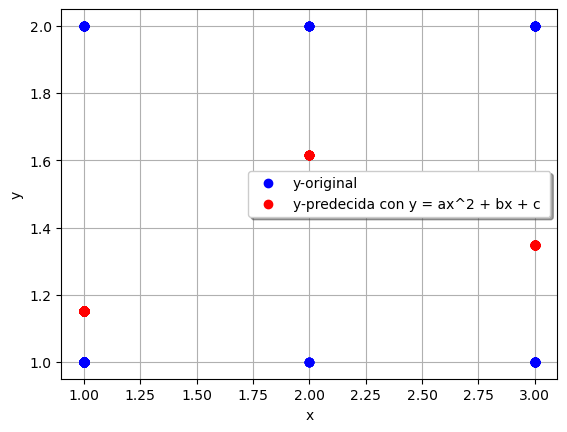

In [1526]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1527]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.09346066499914785

In [1528]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.305713370658118)

Nos da una R de 0.30 (que es mejor que el 0.23 de la regresión lineal)

### Función cociente entre polinomios

In [1529]:
Vars_Indep = df_num[['Project Health']]
Var_Dep = df_num[['On-hold']]

In [1530]:
x= Vars_Indep
y= Var_Dep

In [1531]:
def func_coc(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [1532]:
parametros5, covs= curve_fit(func_coc, df['Project Health'], df['On-hold'])

In [1533]:
parametros5

array([3892.83458146, -771.10061616, 2705.95162578])

In [1534]:
y_pred5 = func_coc(x, *parametros5)

In [1535]:
y_pred5

,Project Health
0,1.153655
1,1.406957
2,1.406957
3,1.153655
4,1.153655
...,...
240,1.153655
241,1.153655
242,1.153655
243,1.153655


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/947207523.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/947207523.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred5,'bo', label="y-predecida con:", color= "red")


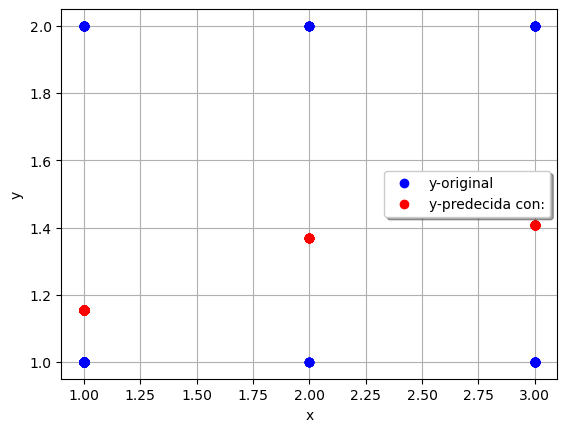

In [1536]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred5,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1537]:
R2_Modelo5 = r2_score(y, y_pred5) 
R2_Modelo5

0.06836274852954993

In [1538]:
R = np.sqrt(R2_Modelo5)
R

np.float64(0.2614627096347583)

Nos da una R de 0.26 (que es mejor que el 0.23 de la regresión lineal pero menor que el 0.30 del modelo cuadrático)

## On-hold

### funcion cuadratica 

In [1539]:
Vars_Indep = df_num[['On-hold']]
Var_Dep = df_num[['Project Health']]

In [1540]:
x= Vars_Indep
y= Var_Dep

In [1541]:
def  func_cuad (x, a, b, c):
     return a*x**2 + b*x + c

In [1542]:
parametros1, covs= curve_fit(func_cuad, df['On-hold'], df['Project Health'])

In [1543]:
parametros1

array([ -54.60497486,  164.26193293, -108.28763989])

In [1544]:
y_pred1 = func_cuad(x, *parametros1)

In [1545]:
y_pred1

,On-hold
0,1.369318
1,1.816327
2,1.369318
3,1.816327
4,1.369318
...,...
240,1.369318
241,1.369318
242,1.369318
243,1.369318


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/2875430875.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")


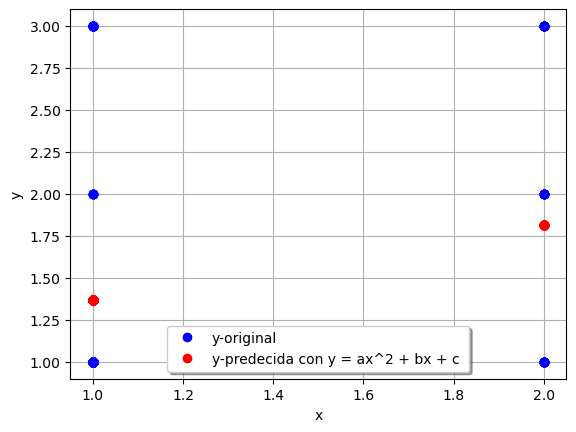

In [1546]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = ax^2 + bx + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1547]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.05174826380183517

In [1548]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.22748244723897967)

Nos da una R de 0.22 (que es menor que el 0.23 de la regresión lineal) pero aún así este modelo es uno de los mejores.

### funcion logaritmica 

In [1549]:
Vars_Indep = df_num[['On-hold']]
Var_Dep = df_num[['Project Health']]

In [1550]:
x= Vars_Indep
y= Var_Dep

In [1551]:
def  func_log (x, a, b):
     return a*np.log(x) + b

In [1552]:
parametros2, covs= curve_fit(func_log, df['On-hold'], df['Project Health'])

In [1553]:
parametros2

array([0.64489673, 1.36931818])

In [1554]:
y_pred2 = func_log(x, *parametros2)

In [1555]:
y_pred2

,On-hold
0,1.369318
1,1.816327
2,1.369318
3,1.816327
4,1.369318
...,...
240,1.369318
241,1.369318
242,1.369318
243,1.369318


/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/3016627666.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_41393/3016627666.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con y = 1/a*x ", color= "red")


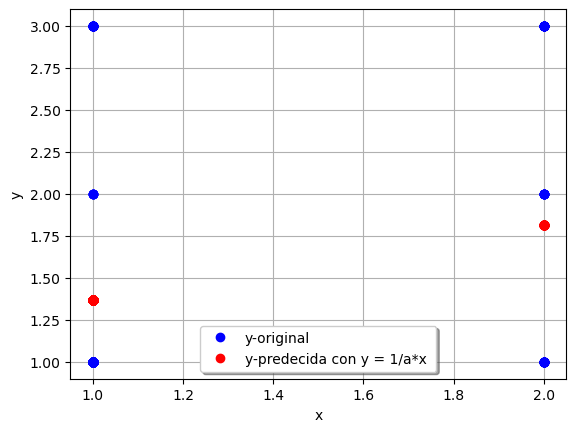

In [1556]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con y = 1/a*x ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [1557]:
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2 

0.05174826380183495

In [1558]:
R = np.sqrt(R2_Modelo2)
R

np.float64(0.22748244723897917)

Nos da una R de 0.22 (que es menor que el 0.23 de la regresión lineal y es igual al 0.22 del modelo cuadrático) pero aún así este modelo es uno de los mejores.